# Baseball Case Study Project

### Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [1]:
# Importing Required Libraries

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("baseball.csv")

Reading the csv file from the system saved csv file

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [5]:
df.sample(3)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
22,71,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77


In the above cell we are taking a look at our dataset which seems to be very small but due to the columns not being descriptive we are unable to understand the content much. We will take help from the Wikipedia link that was provided to get further insights on our dataset during it's analysis process.

However in the problem statement itself we have the below information given to us.

- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

- Output label: Number of predicted wins (W)

# Exploratory Data Analysis (EDA)

In [6]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Here we have listed all the column names present in our data that is not making much sense and will need deciphering to be converted into understandable format.

Pitching statistics:

- W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)
- RA – Run average: number of runs allowed times nine divided by innings pitched
- ER – Earned run: number of runs that did not occur as a result of errors or passed balls
- ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
- CG – Complete game: number of games where player was the only pitcher for their team
- SHO – Shutout: number of complete games pitched with no runs allowed
- SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

Batting statistics:
- R – Runs scored: number of times a player crosses home plate
- AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
- H – Hit: reaching base because of a batted, fair ball without error by the defense
- 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
- 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
- HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
- BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
- K – Strike out (also abbreviated SO): number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base.

Baserunning statistics:

- SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
- R – Runs scored: times reached home plate legally and safely

Fielding statistics:

- E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

Now that we have clearer understanding on what the abbreviation mean and that they come from different statistics we should be able to figure out the scoring procedure details.

In [7]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

In [8]:
df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


After we were able to decipher the meaning of all the given abbreviations thanks to the Wikipedia page I have now replaced all the column names with their understandable full forms for understanding purpose.

Here we can clearly see that the "Wins" column is our target label and the remaining columns are our features that will determine and help us predicting the wins in a particular baseball game. As the target label "Wins" comprises of all continous data it makes this to be a Regression problem

In [9]:
df.shape

(30, 17)

With the help of the shape method we can see that our dataset only has 30 rows and 17 columns and we will need to try and retain all the given information while building our ML model.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

In the info method we are able to take a look at the data types of our dataset columns. It shows that we have 16 columns with integer datatype and 1 column with float datatype. Since there are no object datatype present in our dataset no encoding process will be needed.

In [11]:
df.isna().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

<AxesSubplot:>

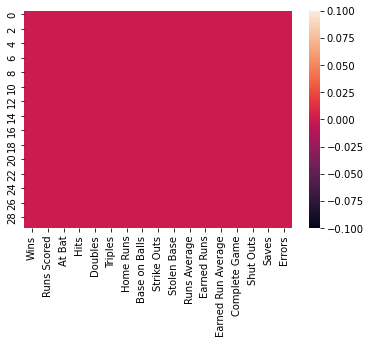

In [12]:
sns.heatmap(df.isnull())

Luckily we have no missing data in our dataset either so we won't have to worry about handling missing data either and can simply check for skewness and outlier details now.

## Statistical Summary

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


As there were many column we are using the Transpose method to view the description details clearly. Looking at the first column we can clearly see that all of them have 30.0 as their count confirming no missing values.

Also when we try to eye ball the other columns like mean, standard deviation, minimum values, 25% quartile, 50% quartile, 75% quartile and maximum values then they are seem to be progressing in a definite manner showing no visible abnormalities.

In [14]:
df.skew()

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut Outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

The acceptable range for skewness is between +/-0.5. We see columns such as Runs Scored, Hits, Complete Game, Saves and Errors being slightly out of this range.

We shall inspect further in regards to the skewness information to determin whether it needs to be treated or not.

In [15]:
df.nunique()

Wins                  24
Runs Scored           28
At Bat                29
Hits                  29
Doubles               22
Triples               23
Home Runs             27
Base on Balls         29
Strike Outs           29
Stolen Base           27
Runs Average          30
Earned Runs           30
Earned Run Average    30
Complete Game          9
Shut Outs             12
Saves                 20
Errors                21
dtype: int64

Taking a look at all the unique values present in each of the columns in our dataset. It shows that there are no categorical data since even the unique numbers are large in number and cannot be segregated or combined.

# Data Visualization

### Univariate Analysis

#### Strip Plot

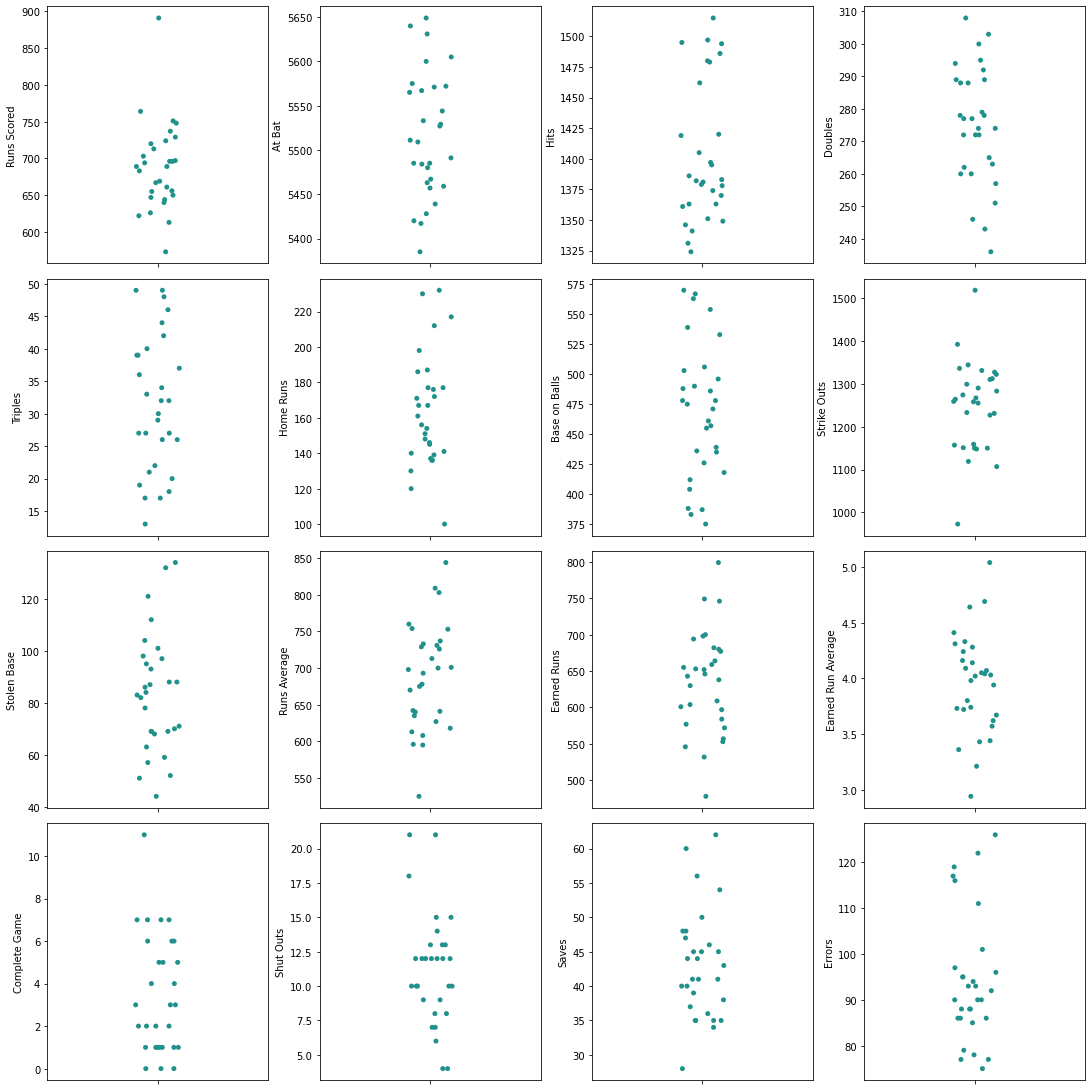

In [16]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.stripplot(y=col, data=df, ax=ax[index], palette="viridis")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

With the help of above strip plot we are able to take a look at data point distribution across the data set and it's range details. We can see columns Runs Scored, Strike Outs, Complete Game with single data points further away from the general accumulation indicating towards the presence of ouliers.

#### Box Plot

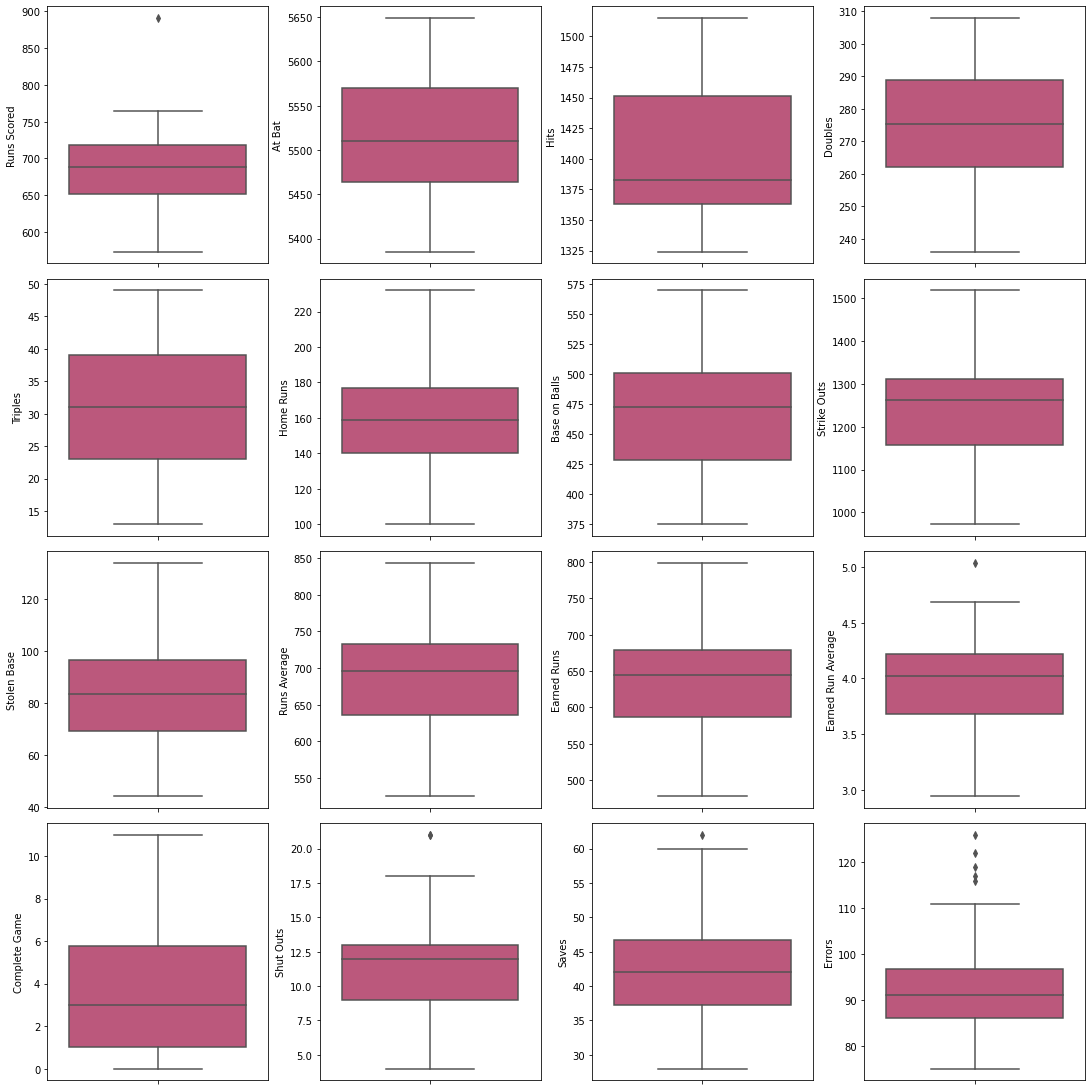

In [17]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

The above box plot representation clearly shows few outlier points present in Runs Scored, Earned Run Average, Shut Outs, Saves and Errors. These will need to be treated further before building our machine learning model.

#### Distribution Plot

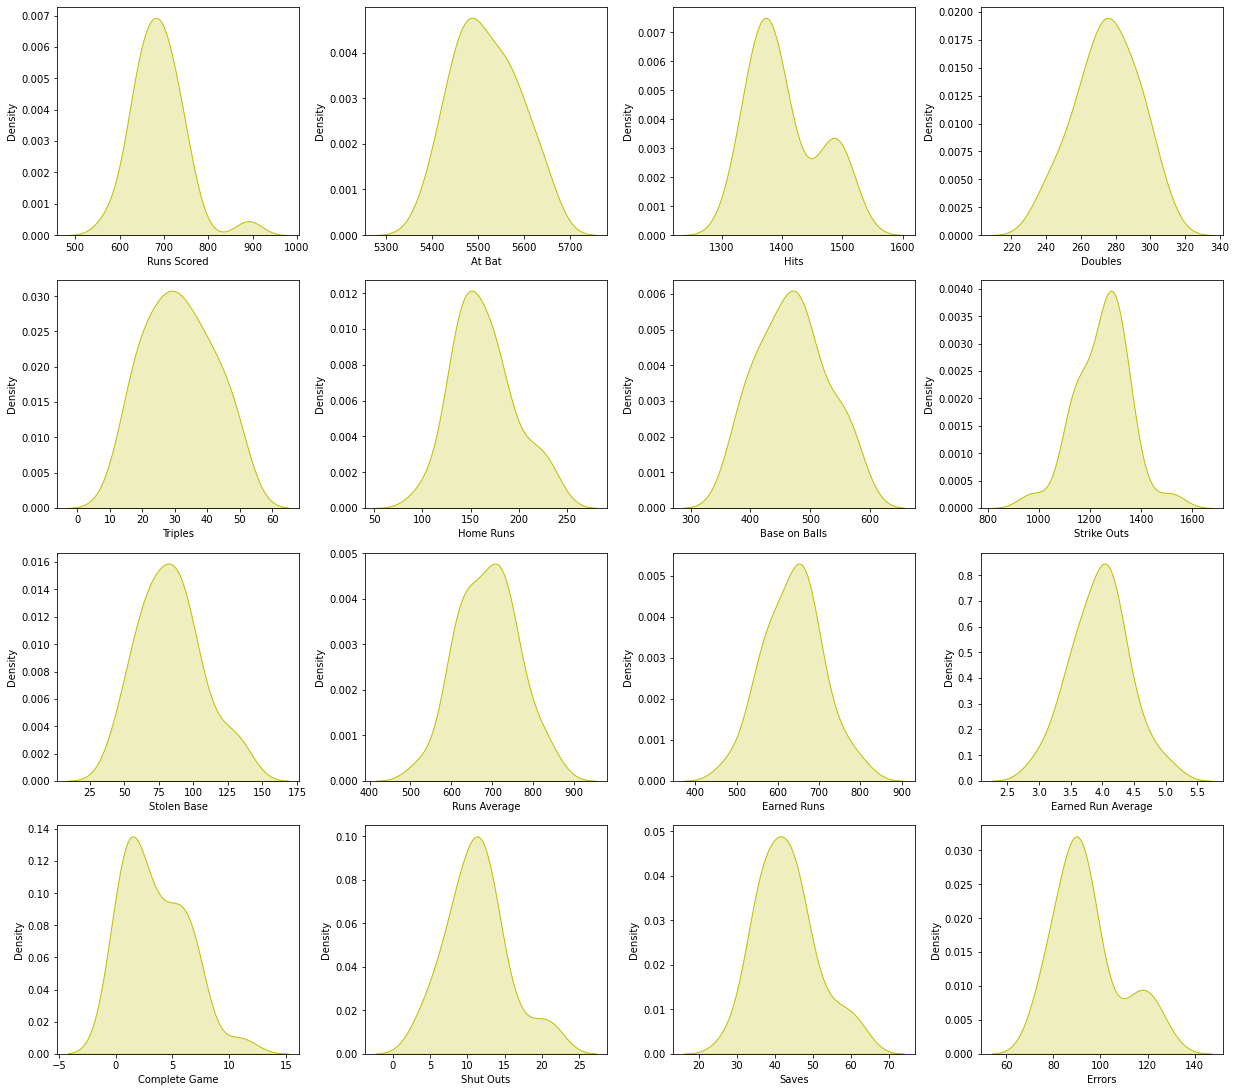

In [18]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In the above cell we see that mostly all our column data are normally distributed except for Runs Scored,Hits, Complete Game, Shut Outs and Errors columns that have slight skewness in them and will need to be treated accordingly.

### Bivariate analysis

#### Line Plot

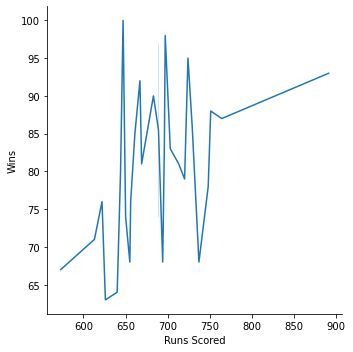

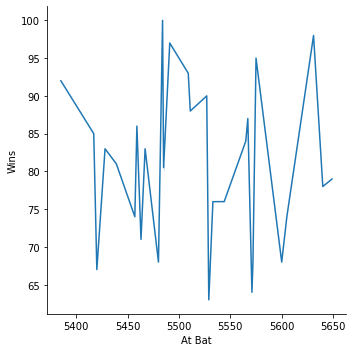

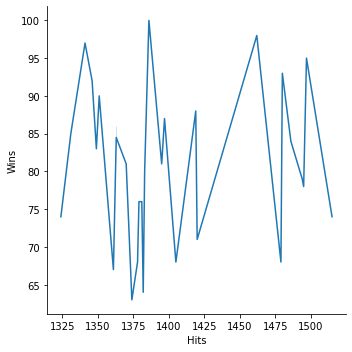

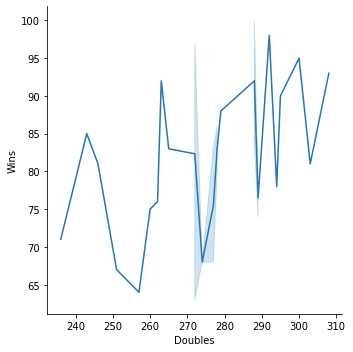

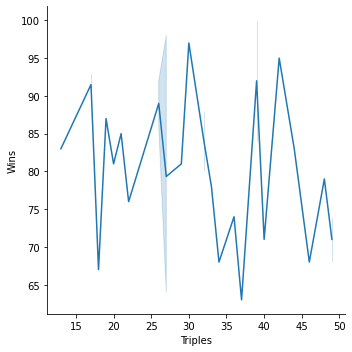

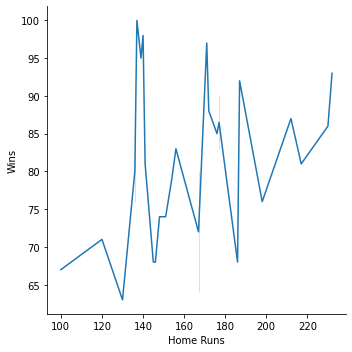

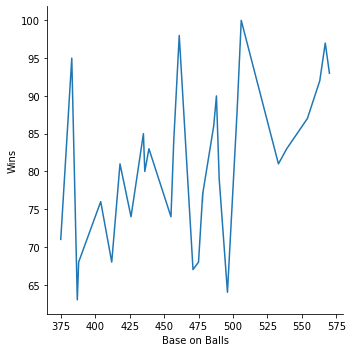

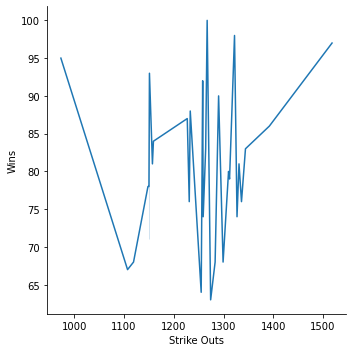

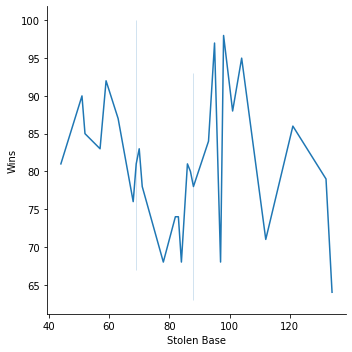

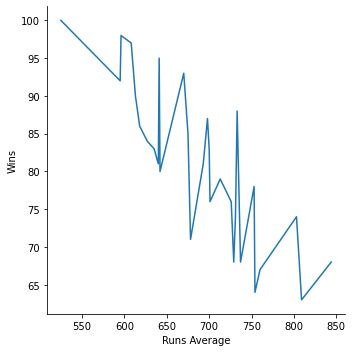

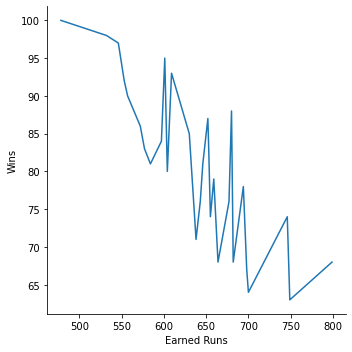

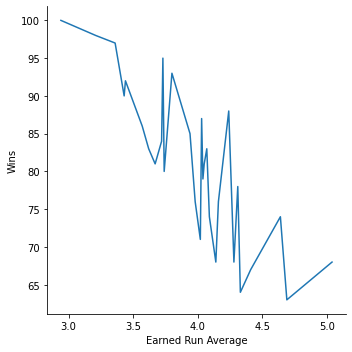

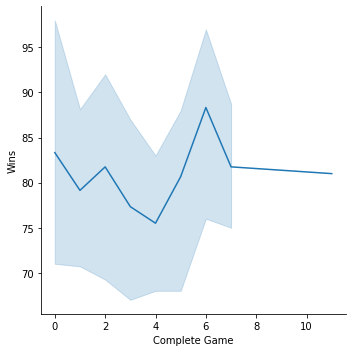

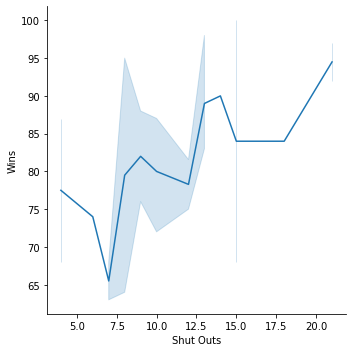

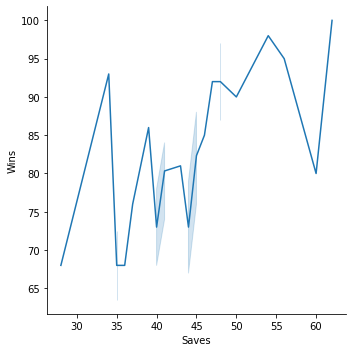

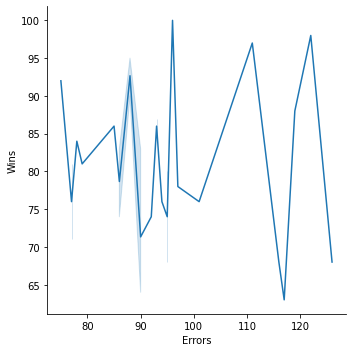

In [19]:
index = 0
features = df.drop("Wins", axis=1)
for col, value in features.items():
    sns.relplot(x=col, y="Wins", kind="line", data=df)
    index += 1
plt.show()

By taking a look at all the line plots corresponding to the "Wins" column shows how those feature are related with the contribution on getting those particular numbers. Some of them are directly proportional while others are either inversely proportional to our label or do not have much to offer.

Therefore we can say that the relationships between the label and all the features can be viewed from above graphs: 
- All of the above features (except the errors) are positively correlated with our label.
- In case the number of runs increases then the chance of win increases. 
- In case the doubles increase then the chance of win increases. 
- In case the triples increases then the chance of win increases. 
- In case the home runs increases then the chance of win increases. 
- In case the walks on balls increases then the chance of win increases. 
- In case the strike outs increases then the chance of win increases for the opposite team. 
- In case the stolen bases increases then the chance of win increases again for the opposite team. 
- In case the runs allowed increases then the chance of win increases. 
- In case the earned run and earned run average increases the chance of win increases automatically.

#### Bar Plot

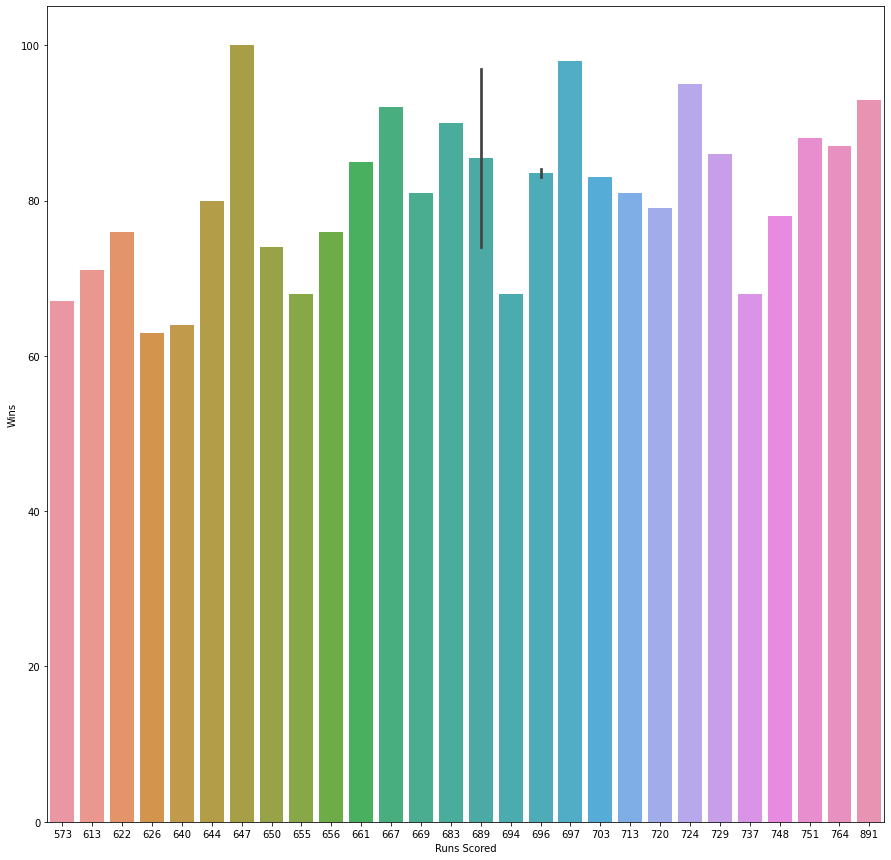

In [20]:
plt.figure(figsize=(15,15))
sns.barplot(x="Runs Scored", y="Wins", data=df)
plt.show()

Feature "Runs Scored" and it's unique values are distributed unevenly when it comes to relating with our label "Wins"

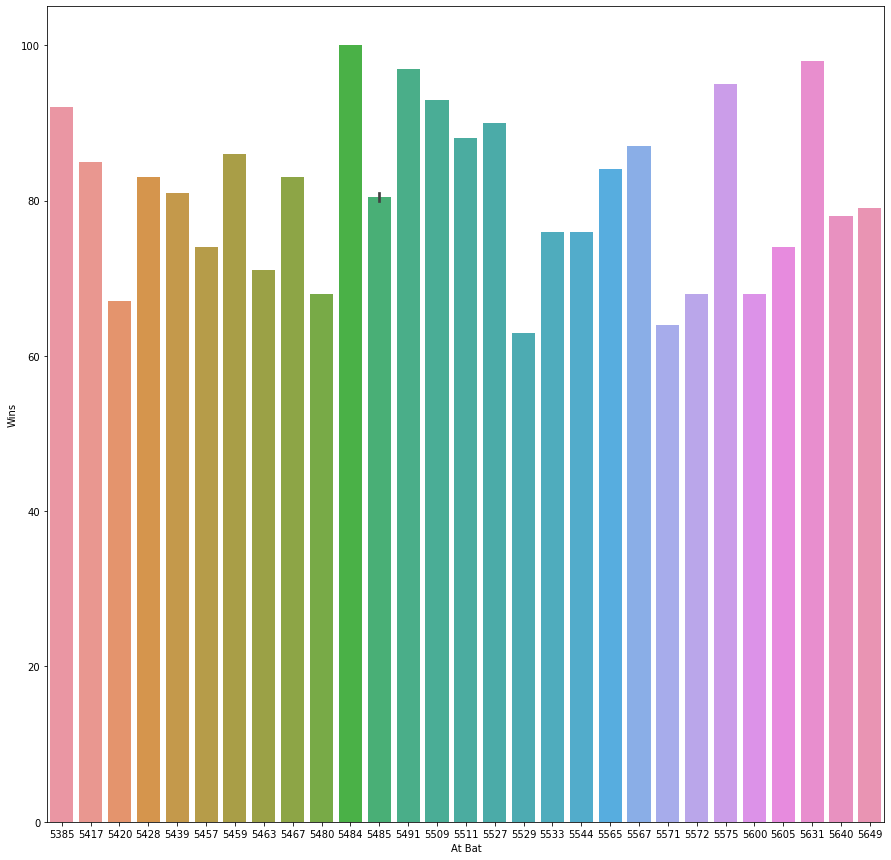

In [21]:
plt.figure(figsize=(15,15))
sns.barplot(x="At Bat", y="Wins", data=df)
plt.show()

Feature "At Bat" and it's unique values are again distributed unevenly when it comes to relating with our label "Wins"

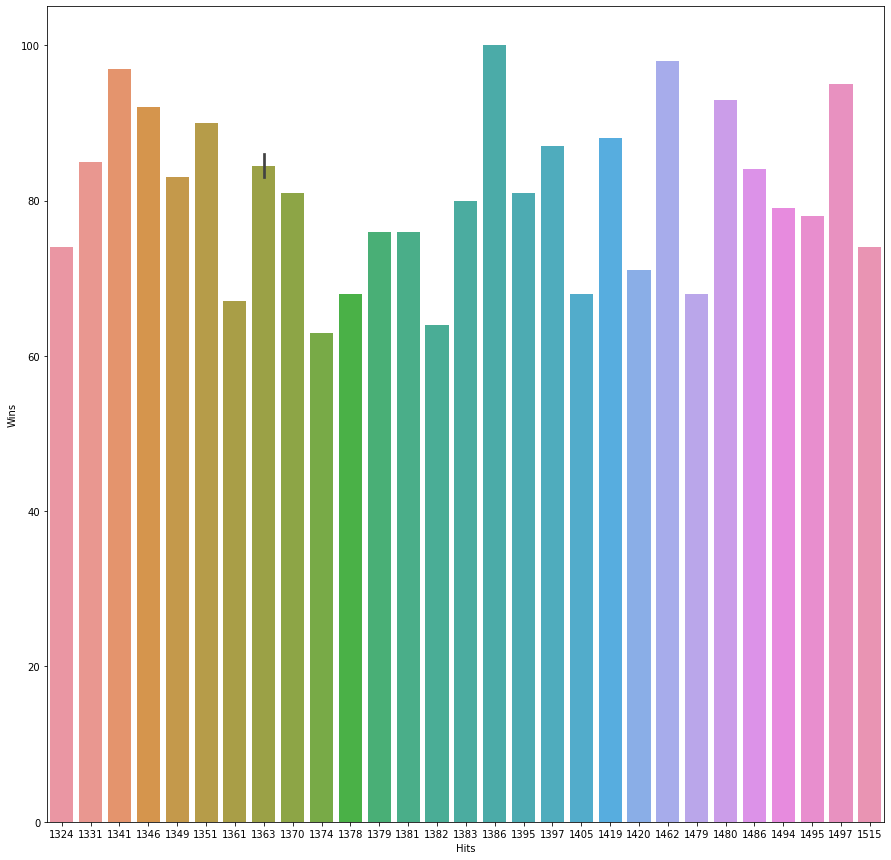

In [22]:
plt.figure(figsize=(15,15))
sns.barplot(x="Hits", y="Wins", data=df)
plt.show()

Feature "Hits" and it's unique values do not show any linear pattern when it comes to relating with our label "Wins"

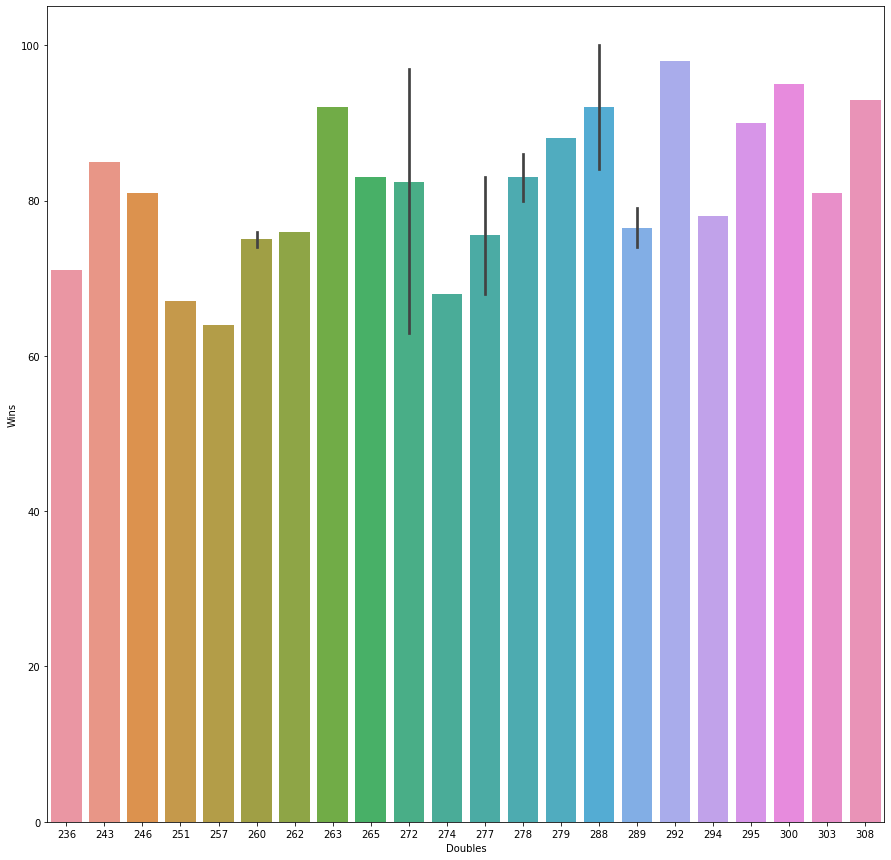

In [23]:
plt.figure(figsize=(15,15))
sns.barplot(x="Doubles", y="Wins", data=df)
plt.show()

Feature "Doubles" and it's unique values again do not form any definite pattern when it comes to relating with our label "Wins"

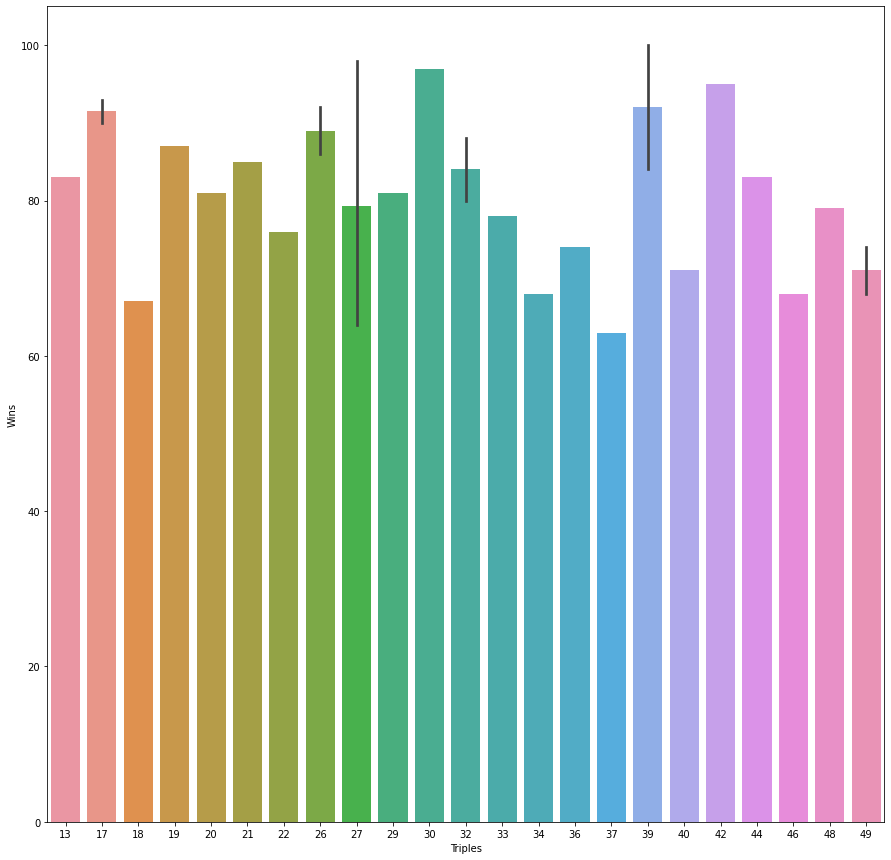

In [24]:
plt.figure(figsize=(15,15))
sns.barplot(x="Triples", y="Wins", data=df)
plt.show()

Feature "Triples" and it's unique values are distributed unevenly when it comes to relating with our label "Wins"

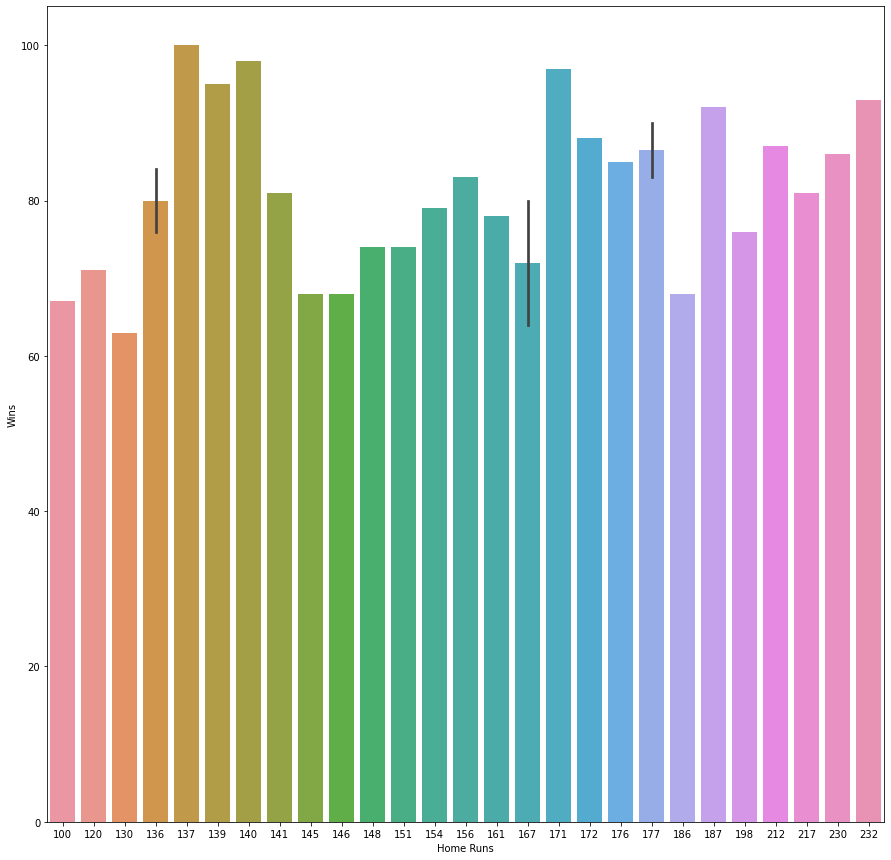

In [25]:
plt.figure(figsize=(15,15))
sns.barplot(x="Home Runs", y="Wins", data=df)
plt.show()

Feature "Home Runs" and it's unique values show a visible increasing pattern when it comes to relating with our label "Wins"

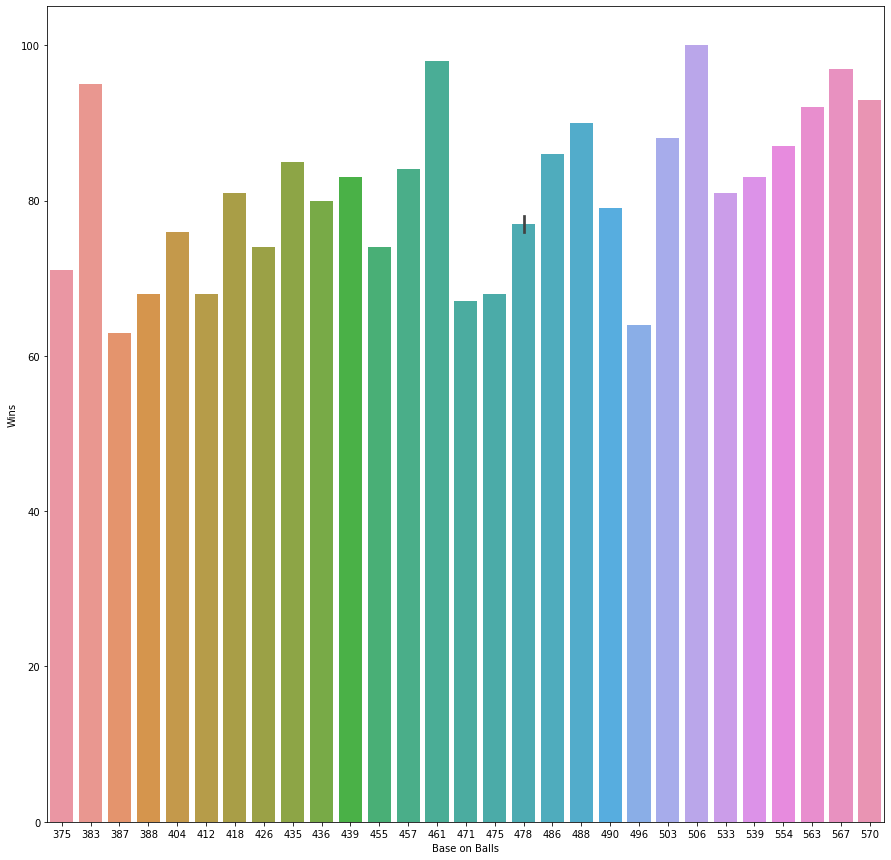

In [26]:
plt.figure(figsize=(15,15))
sns.barplot(x="Base on Balls", y="Wins", data=df)
plt.show()

Feature "Base on Balls" and it's unique values are also distributed unevenly when it comes to relating with our label "Wins"

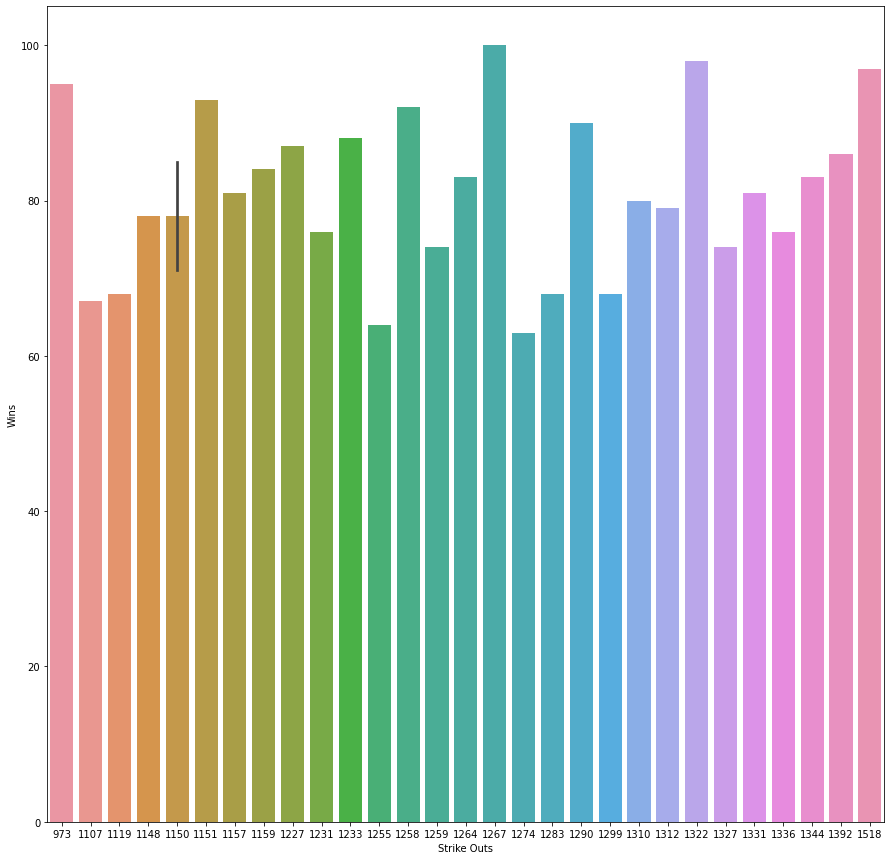

In [27]:
plt.figure(figsize=(15,15))
sns.barplot(x="Strike Outs", y="Wins", data=df)
plt.show()

Feature "Strike Outs" and it's unique values are unevenly patterned when it comes to relating with our label "Wins"

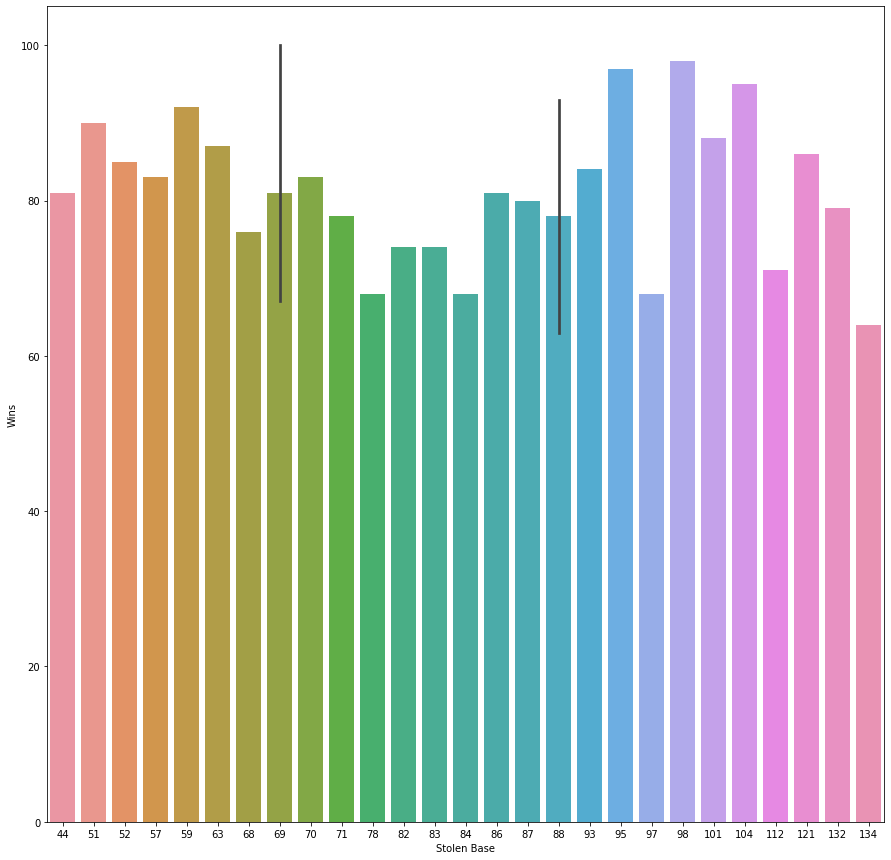

In [28]:
plt.figure(figsize=(15,15))
sns.barplot(x="Stolen Base", y="Wins", data=df)
plt.show()

Feature "Stolen Base" and it's unique values are also distributed unevenly when it comes to relating with our label "Wins"

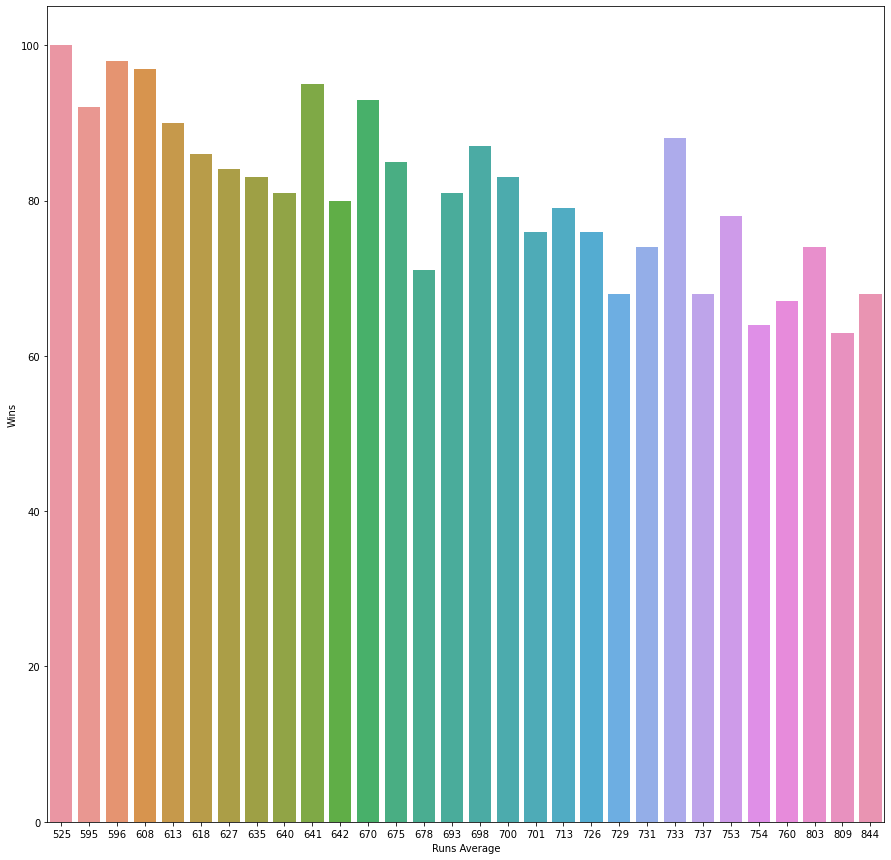

In [29]:
plt.figure(figsize=(15,15))
sns.barplot(x="Runs Average", y="Wins", data=df)
plt.show()

Feature "Runs Average" and it's unique values show a decreasing pattern when it comes to relating with our label "Wins"

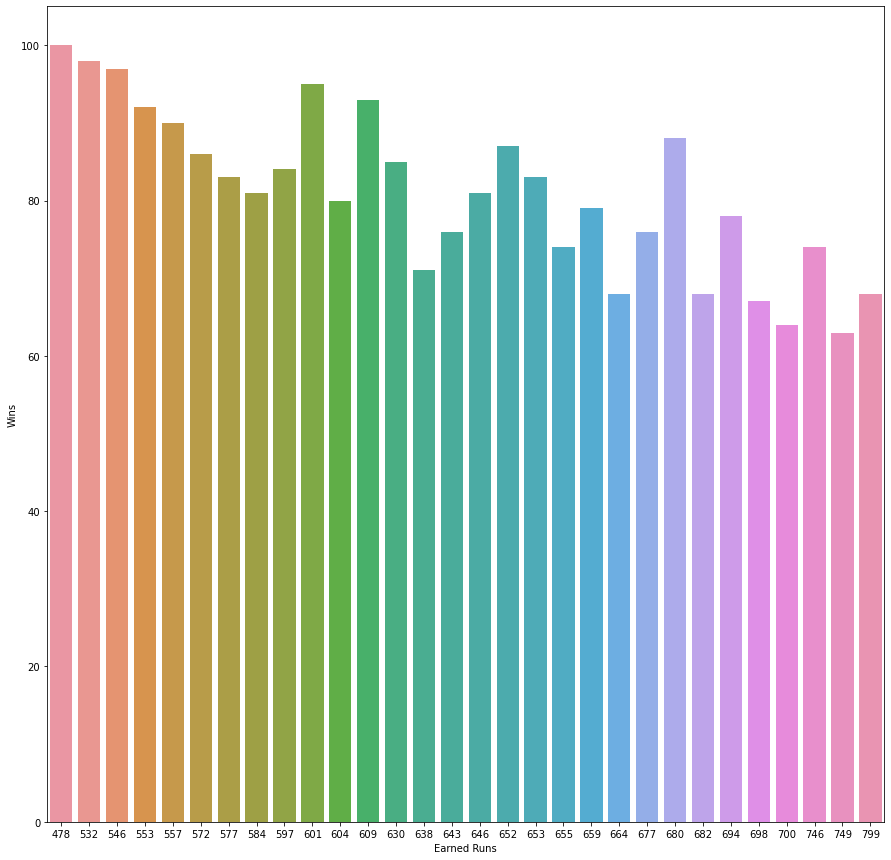

In [30]:
plt.figure(figsize=(15,15))
sns.barplot(x="Earned Runs", y="Wins", data=df)
plt.show()

Feature "Earned Runs" and it's unique values also show a decreasing pattern when it comes to relating with our label "Wins"

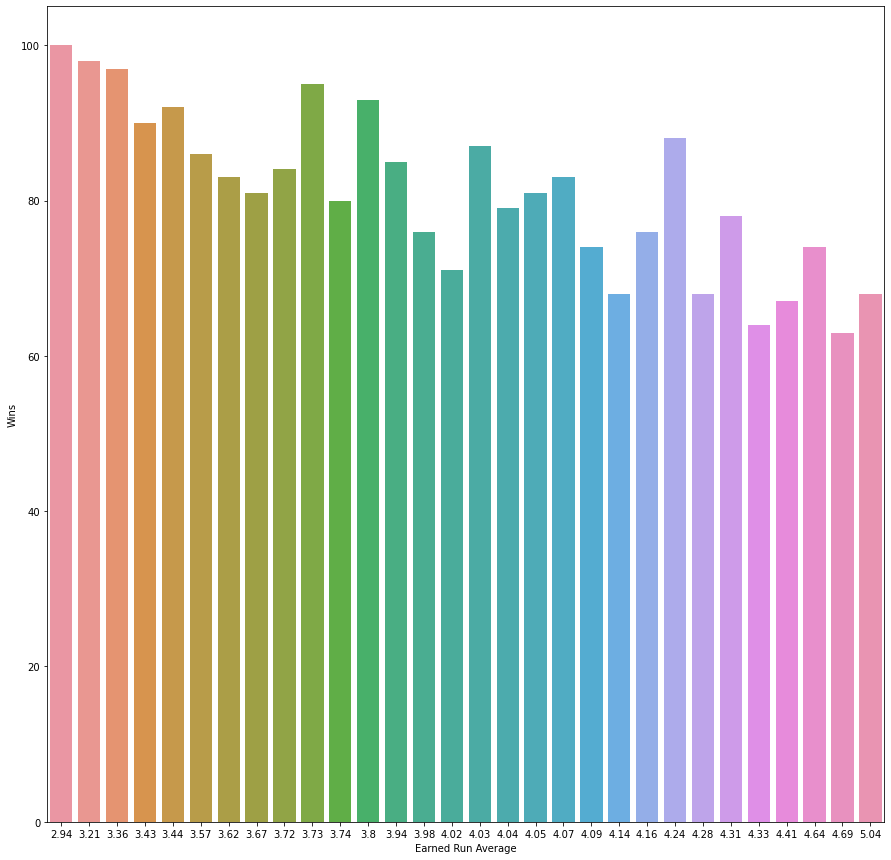

In [31]:
plt.figure(figsize=(15,15))
sns.barplot(x="Earned Run Average", y="Wins", data=df)
plt.show()

Feature "Earned Run Average" and it's unique values are distributed in a slight decreasing order when it comes to relating with our label "Wins"

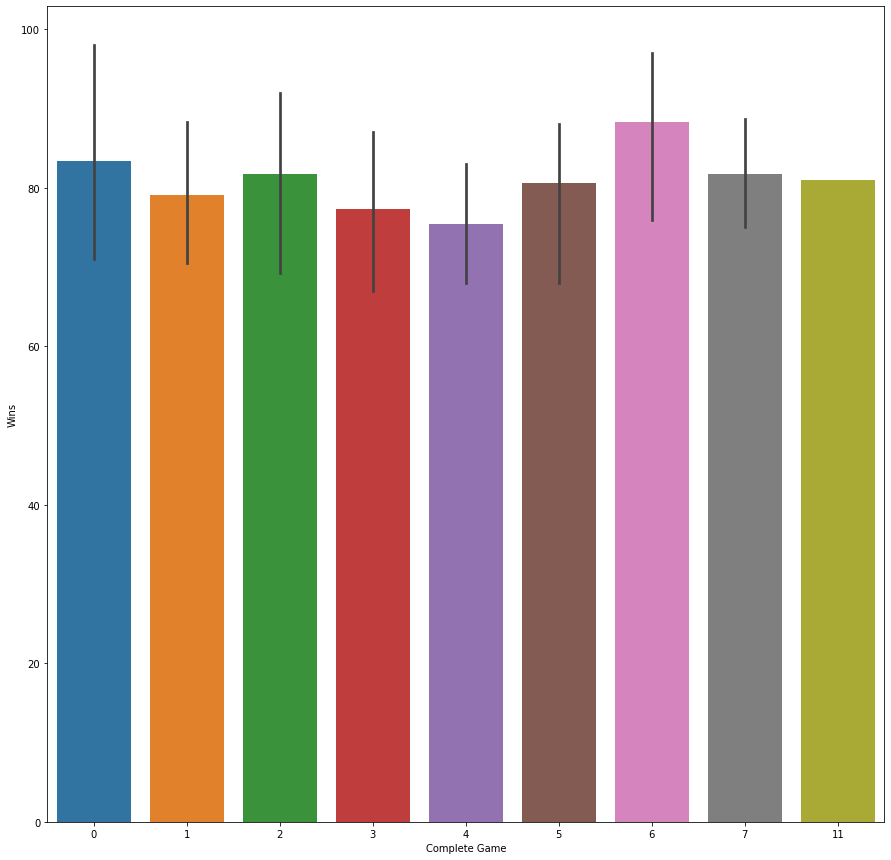

In [32]:
plt.figure(figsize=(15,15))
sns.barplot(x="Complete Game", y="Wins", data=df)
plt.show()

Feature "Complete Game" and it's unique values do not show any pattern when it comes to relating with our label "Wins"

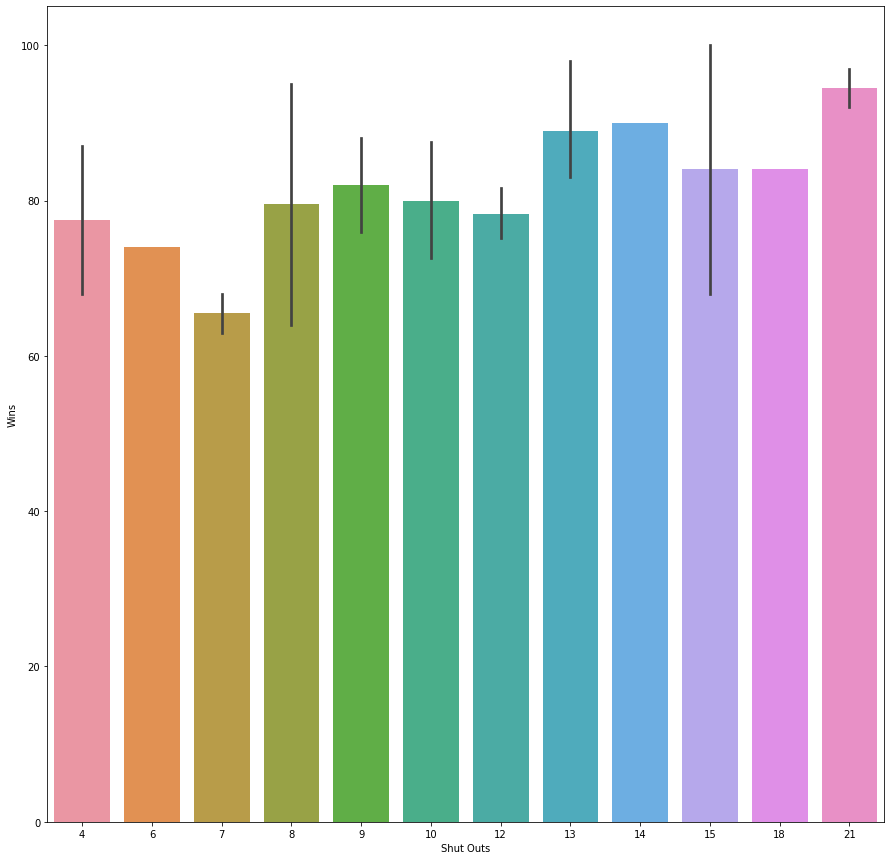

In [33]:
plt.figure(figsize=(15,15))
sns.barplot(x="Shut Outs", y="Wins", data=df)
plt.show()

Feature "Shut Outs" and it's unique values are also distributed unevenly when it comes to relating with our label "Wins"

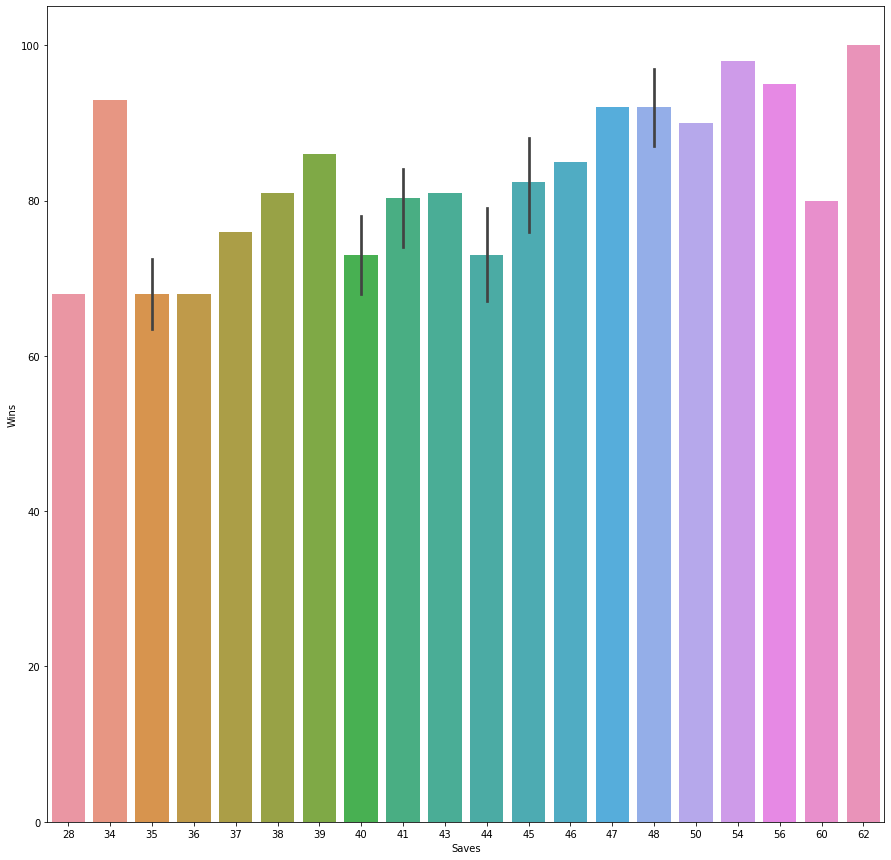

In [34]:
plt.figure(figsize=(15,15))
sns.barplot(x="Saves", y="Wins", data=df)
plt.show()

Feature "Saves" and it's unique values show a slightly increasig pattern when it comes to relating with our label "Wins"

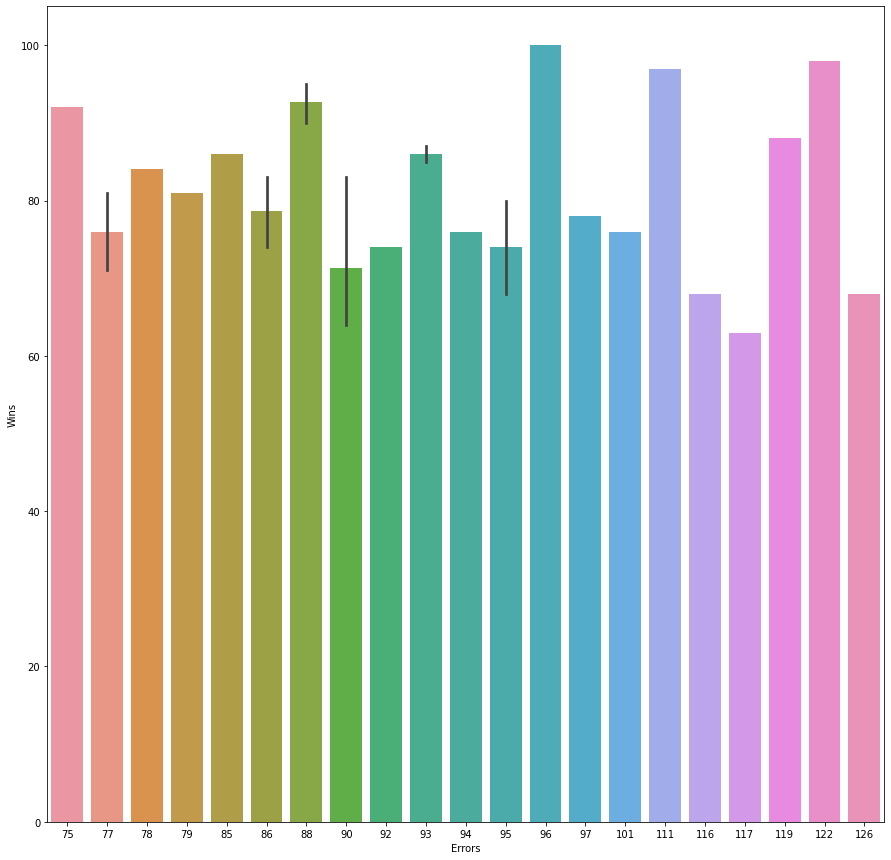

In [35]:
plt.figure(figsize=(15,15))
sns.barplot(x="Errors", y="Wins", data=df)
plt.show()

Feature "Errors" and it's unique values are again distributed unevenly when it comes to relating with our label "Wins"

#### Joint Plot

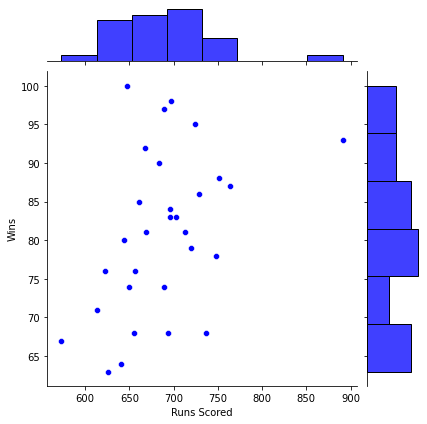

In [36]:
sns.jointplot(x="Runs Scored", y="Wins", data=df, color="blue")

We can say by this plot, as runs are getting higher the chances of winning becomes higher

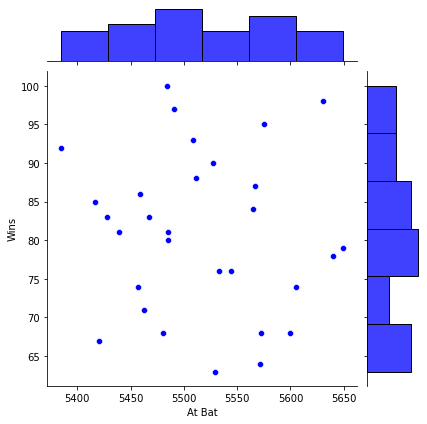

In [37]:
sns.jointplot(x="At Bat", y="Wins", data=df, color="blue")

There is no significant relationship displayed between the label Wins and the feature At Bat and the data points are all over the place

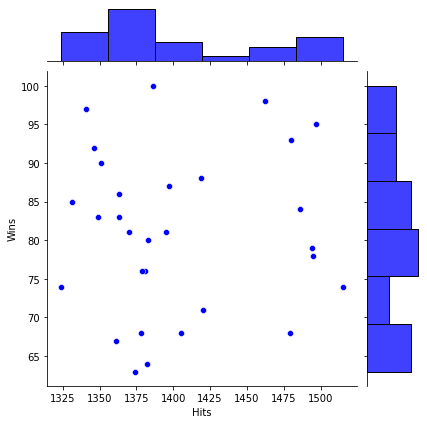

In [38]:
sns.jointplot(x="Hits", y="Wins", data=df, color="blue")

Even here we can't say there is any linear relation with our target variable and the data points are scattered too

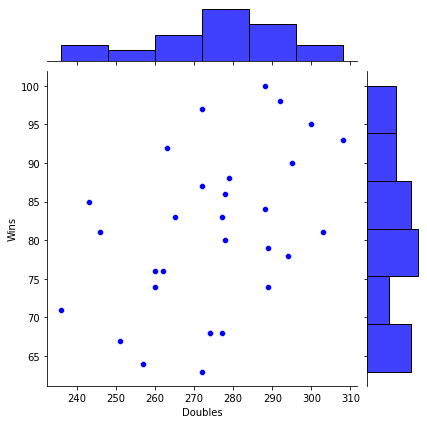

In [39]:
sns.jointplot(x="Doubles", y="Wins", data=df, color="blue")

We see that if number of doubles are under 250 the chances of win is below 85 and if the number of doubles more than 280 then the chance of wins is more than 85

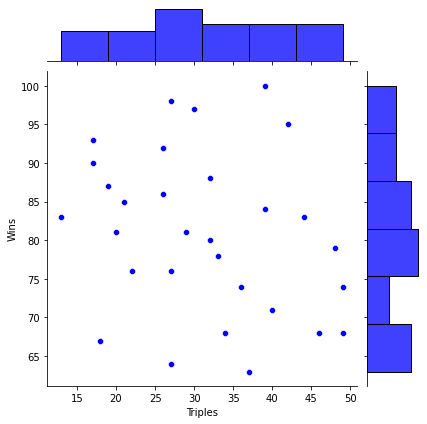

In [40]:
sns.jointplot(x="Triples", y="Wins", data=df, color="blue")

For some reason the data points are scattered showing no relation with the label much and therefore we can say number of triples feature are not much correlated with label wins

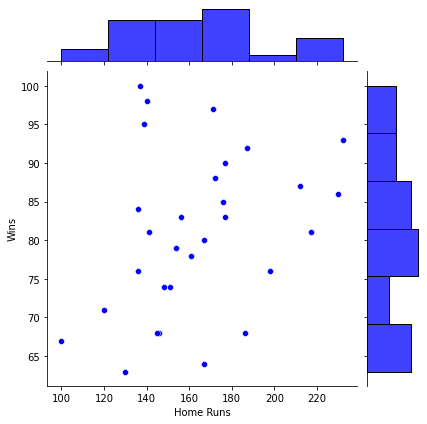

In [41]:
sns.jointplot(x="Home Runs", y="Wins", data=df, color="blue")

By looking at this plot we can say if the number of homeruns is below 140, the chances of wins becoms less

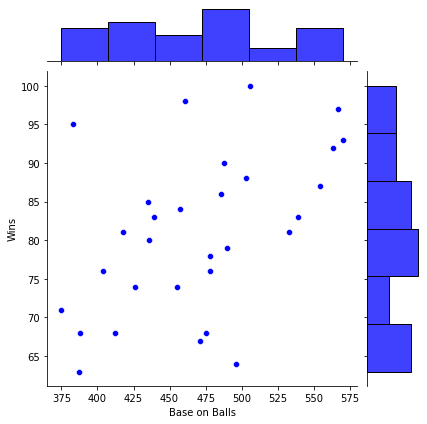

In [42]:
sns.jointplot(x="Base on Balls", y="Wins", data=df, color="blue")

In case the base on balls number is above 525 then number of wins are more than 80 But still there is not much relation is observed between this feature and the label variables

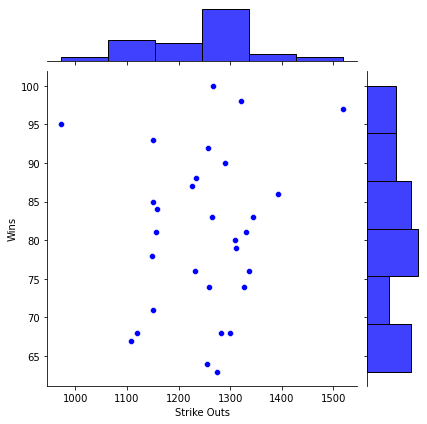

In [43]:
sns.jointplot(x="Strike Outs", y="Wins", data=df, color="blue")

In this feature plot it is not showing any linear relation with number of wins

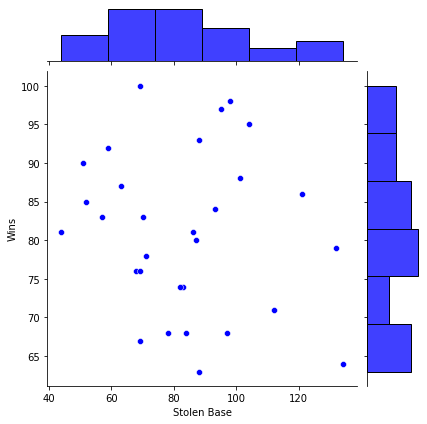

In [44]:
sns.jointplot(x="Stolen Base", y="Wins", data=df, color="blue")

A stolen base happens when a base runner proceeds by capturing a base to which they are not entitled to and here if stolen base is between 40 to 60 the number of wins are above 80

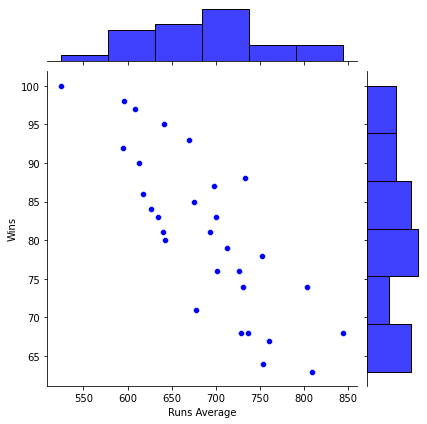

In [45]:
sns.jointplot(x="Runs Average", y="Wins", data=df, color="blue")

By observing the above plot we can say that Runs Average are negatively related to number of wins, that is because as the Runs Average number increases the win possibility decreases

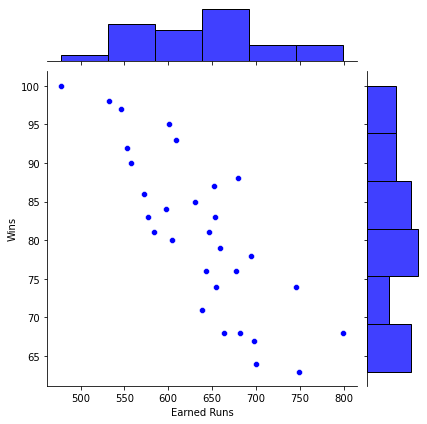

In [46]:
sns.jointplot(x="Earned Runs", y="Wins", data=df, color="blue")

Just like the Runs Average number, Earned Runs also negatively impacts to number of wins

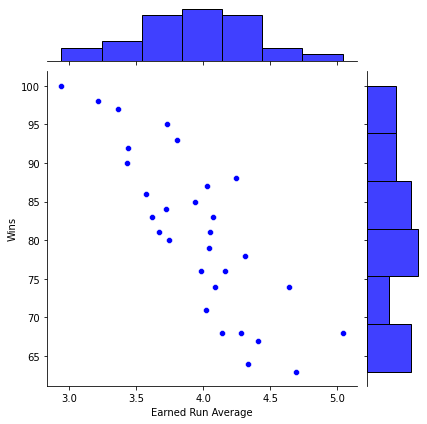

In [47]:
sns.jointplot(x="Earned Run Average", y="Wins", data=df, color="blue")

Earned Runs Average is negatively related to number of wins and is completely depends on feature Earned Runs

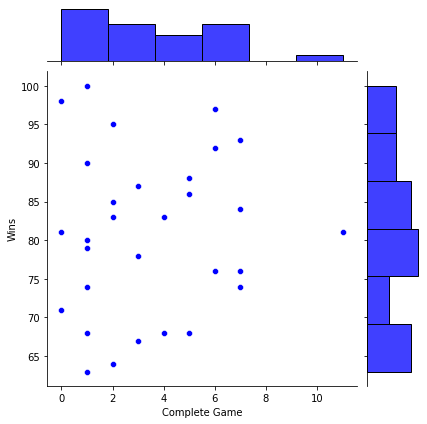

In [48]:
sns.jointplot(x="Complete Game", y="Wins", data=df, color="blue")

We can see that as number of complete games goes above 6 then the number of wins is more than 75 and there is an outlying data present too

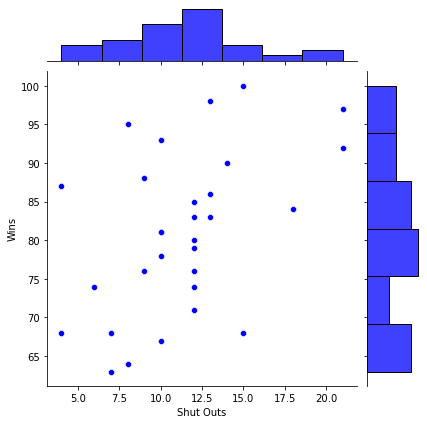

In [49]:
sns.jointplot(x="Shut Outs", y="Wins", data=df, color="blue")

A shut out refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run so here as the shout outs rise the wins number increases too

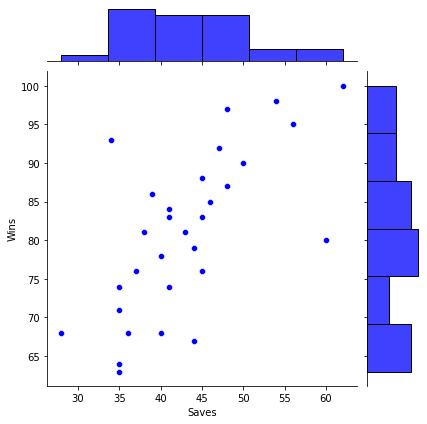

In [50]:
sns.jointplot(x="Saves", y="Wins", data=df, color="blue")

A save is rewarded to the relief pitcher who finishes a game for the winning team under certain circumstances so here as the number of save goes higher the number of wins also increases

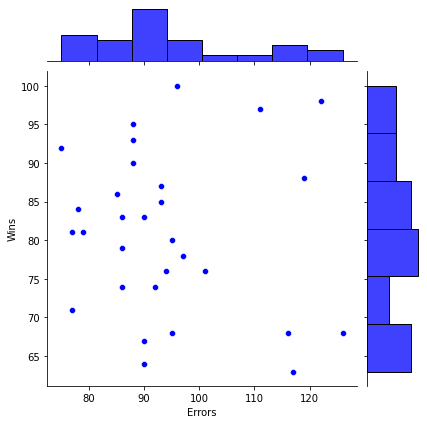

In [51]:
sns.jointplot(x="Errors", y="Wins", data=df, color="blue")

In baseball statistics an error is an act in the judgment of the official scorer of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. So here the number of errors are more in the range of 70 to 100 impacting the wins

#### LM Plot

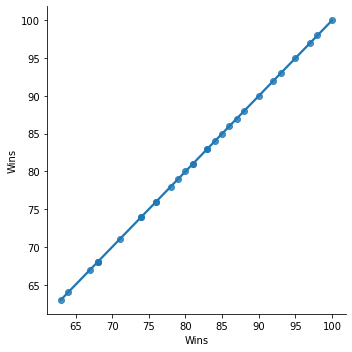

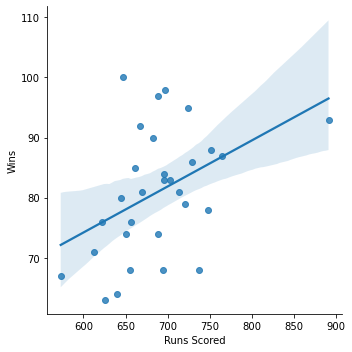

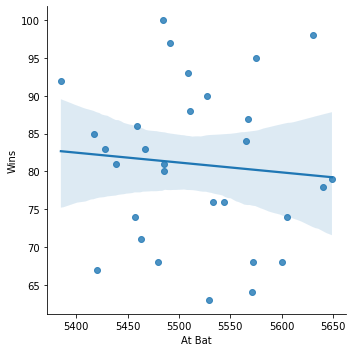

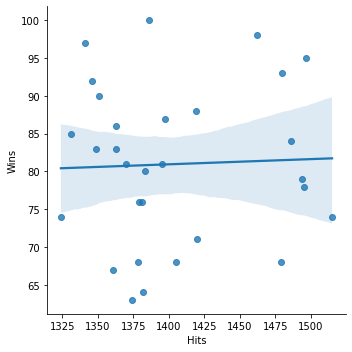

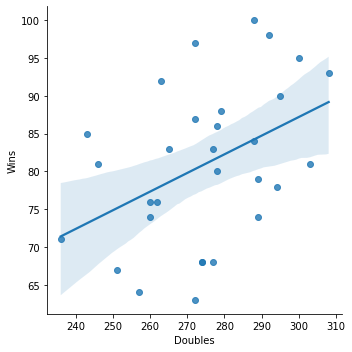

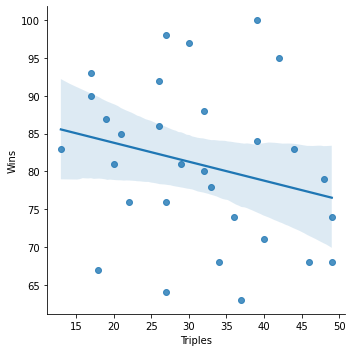

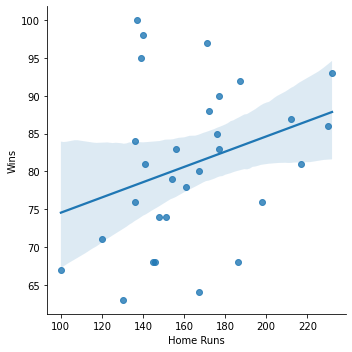

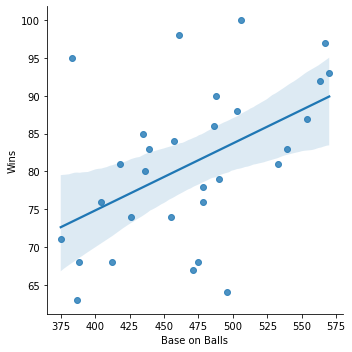

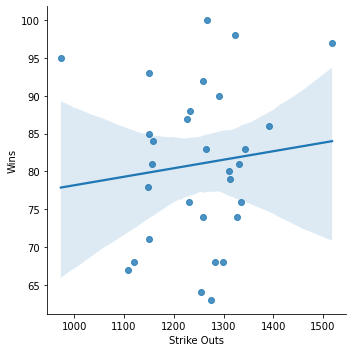

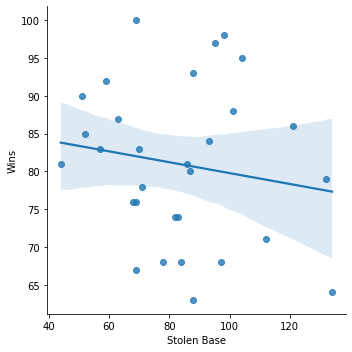

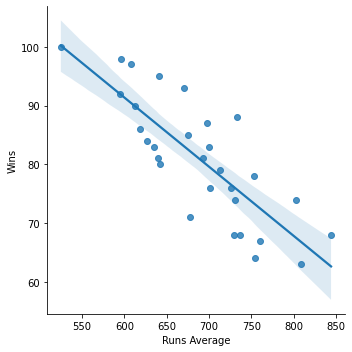

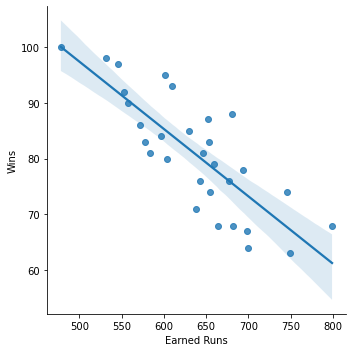

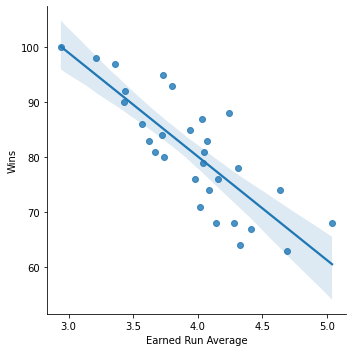

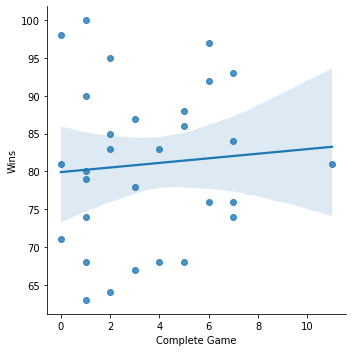

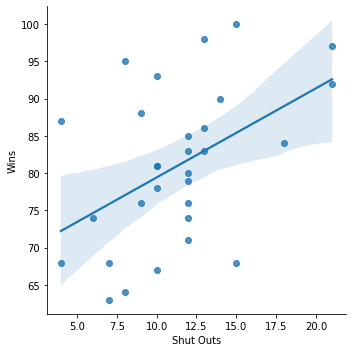

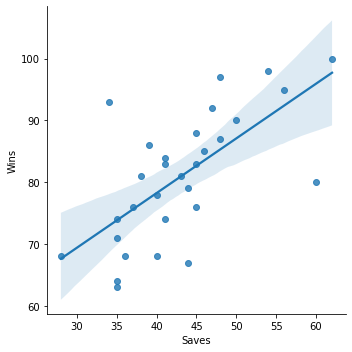

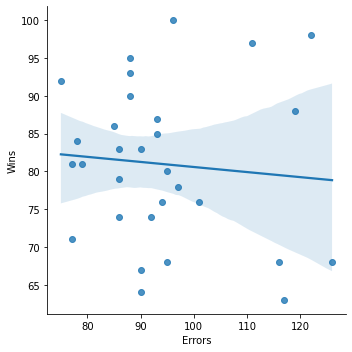

In [52]:
for i in df:
    sns.lmplot(x = i , y ='Wins' , data = df)

From above plot we can see that runs is directly proportional to wins, At Bats is inversely proportional to wins, Hits is not much impacted by Wins, Doubles is proportional to Wins, Triples is again proportional to Wins, Home runs is proportional to Wins, Walks is also proportional to wins, Strike out is proportional to wins, Stolen bases is proportional to Wins, Runs allowed is inversely proportional to Wins, Earned runs is again inversely proportional to Wins, Earned runs average is also inversely proportional to Wins, Wins is somewhat affected by the number of Complete Games, Wins is slightly affected by shut outs and Wins is directly propertional to Saves.

## Multivariate Analysis

### Pair Plot

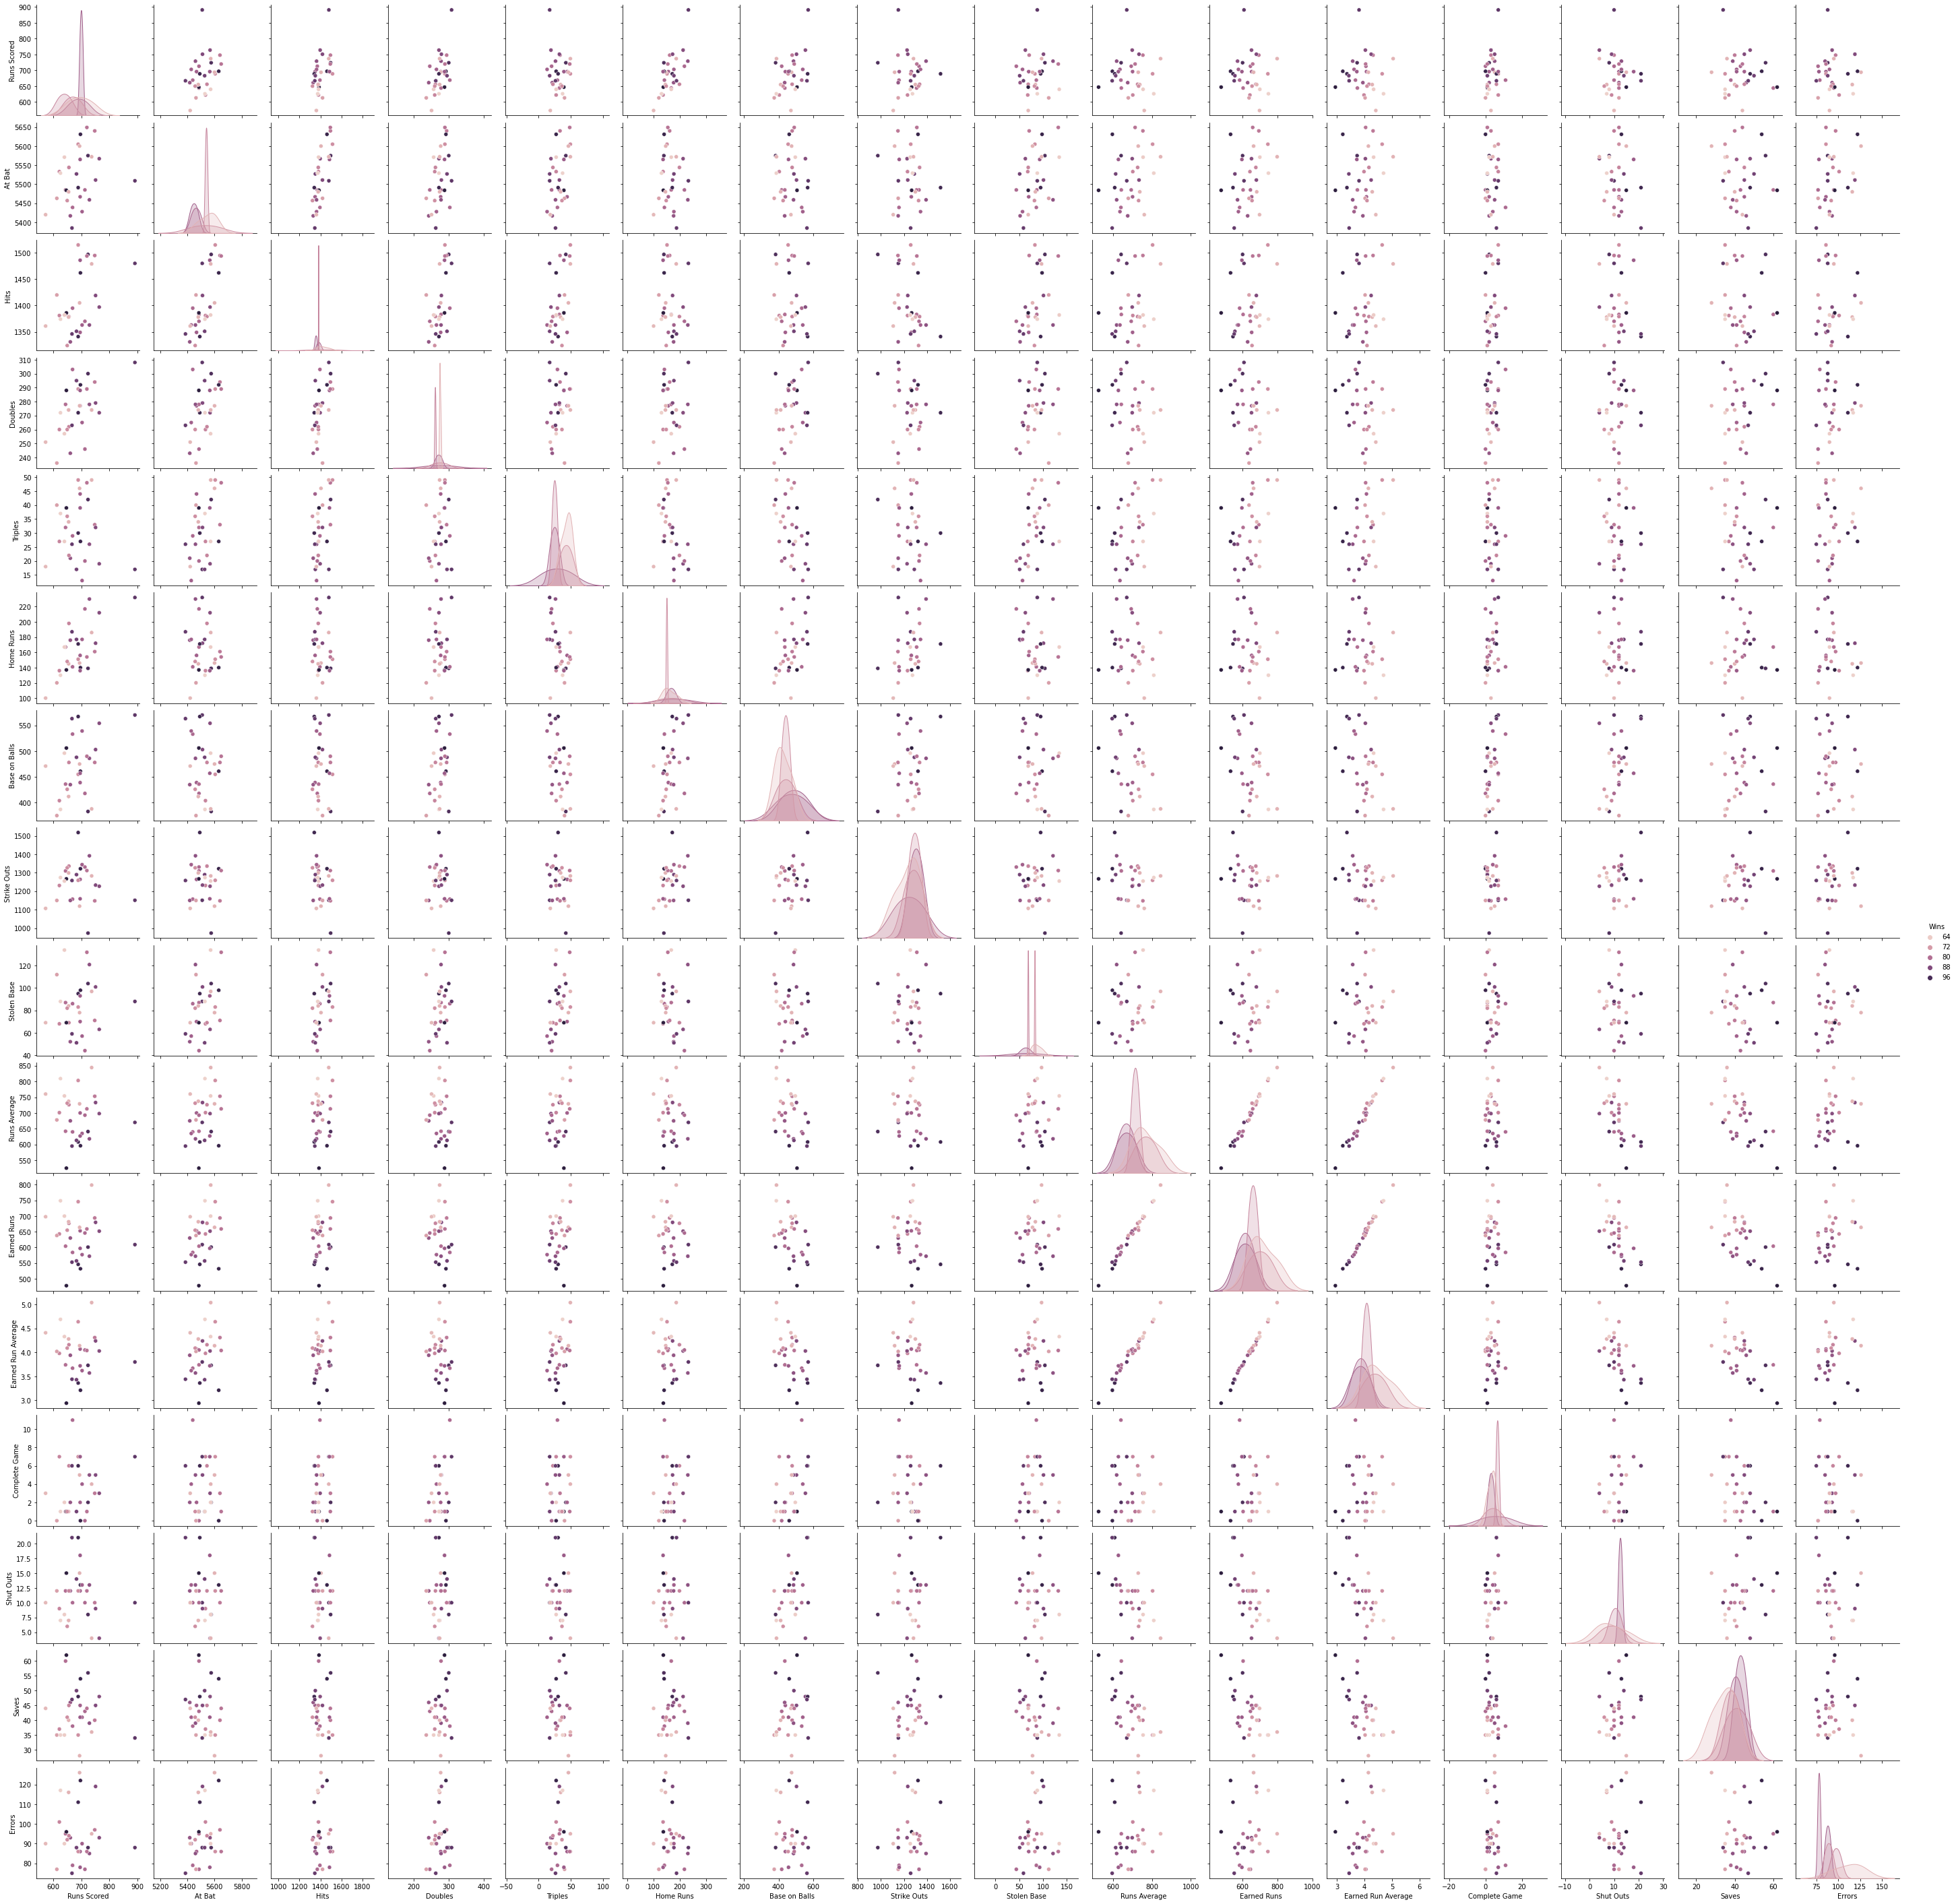

In [53]:
sns.pairplot(df, hue="Wins")

Since there are 17 columns present in our dataset making a pairplot for all of them has given us a very tiny image with an unreadable format therefore we will take help of a heatmap to get the collinearity details for the columns in our dataset.

## checking Correlation

Correlation using a Heatmap

- Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

- Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

In [54]:
df.corr()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs Scored,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Home Runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Base on Balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strike Outs,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


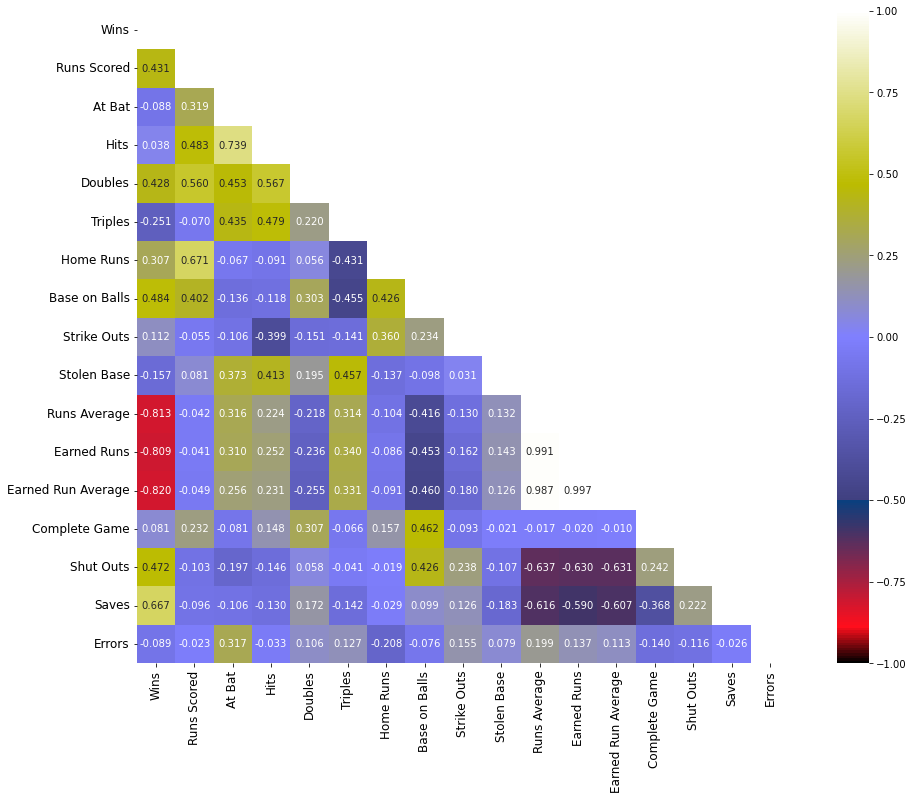

In [55]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [56]:
df.corr()['Wins'].sort_values()

Earned Run Average   -0.819600
Runs Average         -0.812952
Earned Runs          -0.809435
Triples              -0.251118
Stolen Base          -0.157234
Errors               -0.089485
At Bat               -0.087947
Hits                  0.037612
Complete Game         0.080533
Strike Outs           0.111850
Home Runs             0.307407
Doubles               0.427797
Runs Scored           0.430751
Shut Outs             0.471805
Base on Balls         0.484342
Saves                 0.666530
Wins                  1.000000
Name: Wins, dtype: float64

In the above heatmap we see that our label "Wins" column is showing negatively correlated with feature columns "Runs Average", "Earned Runs" and "Earned Run Average". Also there is visible multi colinearity between the feature columns "Earned Runs", "Earned Run Average" and "Runs Average" data points. We may need to drop highly correlated columns to avoid this issue or I may try to make use of PCA to reduce the multi collearnig concern ahead before the model building phase.

### Visualizing the correlation between label and features using bar plot

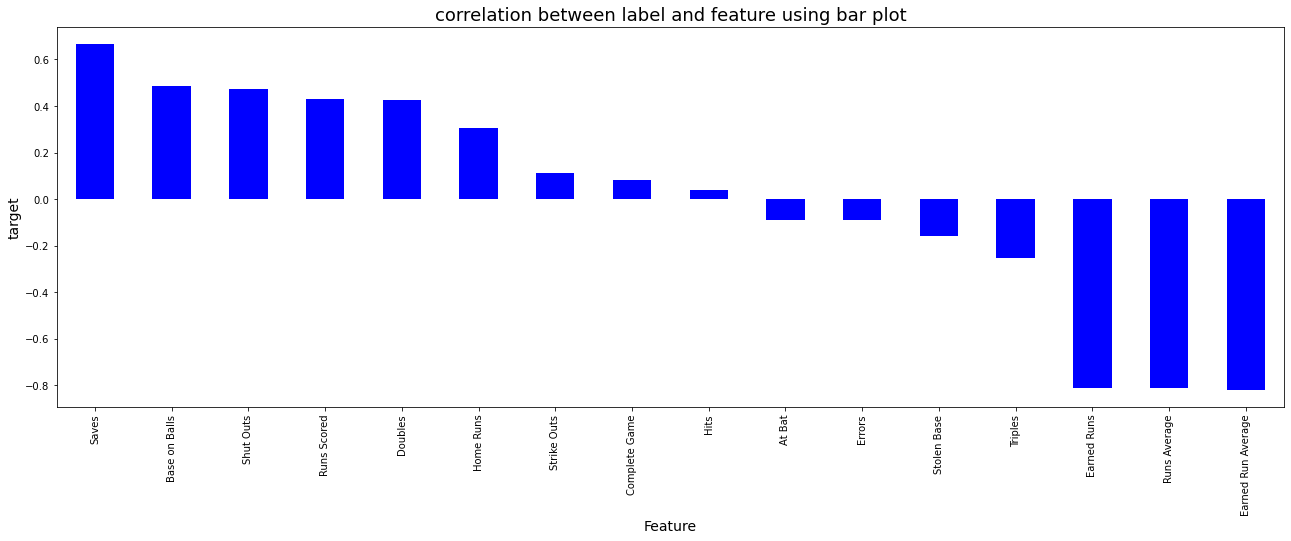

In [57]:
plt.figure(figsize=(22,7))
df.corr()['Wins'].sort_values(ascending=False).drop(['Wins']).plot(kind='bar',color='blue')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

Now we can easily analyse the data, here the feature "H" and "CG" has very less correaltion with the label.  "Earned Runs", "Earned Run Average" and "Runs Average" have high negative correlation with "Wins". 

## Checking Outliers

In [58]:
df.columns

Index(['Wins', 'Runs Scored', 'At Bat', 'Hits', 'Doubles', 'Triples',
       'Home Runs', 'Base on Balls', 'Strike Outs', 'Stolen Base',
       'Runs Average', 'Earned Runs', 'Earned Run Average', 'Complete Game',
       'Shut Outs', 'Saves', 'Errors'],
      dtype='object')

Wins                     AxesSubplot(0.125,0.749828;0.168478x0.130172)
Runs Scored           AxesSubplot(0.327174,0.749828;0.168478x0.130172)
At Bat                AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Hits                  AxesSubplot(0.731522,0.749828;0.168478x0.130172)
Doubles                  AxesSubplot(0.125,0.593621;0.168478x0.130172)
Triples               AxesSubplot(0.327174,0.593621;0.168478x0.130172)
Home Runs             AxesSubplot(0.529348,0.593621;0.168478x0.130172)
Base on Balls         AxesSubplot(0.731522,0.593621;0.168478x0.130172)
Strike Outs              AxesSubplot(0.125,0.437414;0.168478x0.130172)
Stolen Base           AxesSubplot(0.327174,0.437414;0.168478x0.130172)
Runs Average          AxesSubplot(0.529348,0.437414;0.168478x0.130172)
Earned Runs           AxesSubplot(0.731522,0.437414;0.168478x0.130172)
Earned Run Average       AxesSubplot(0.125,0.281207;0.168478x0.130172)
Complete Game         AxesSubplot(0.327174,0.281207;0.168478x0.130172)
Shut O

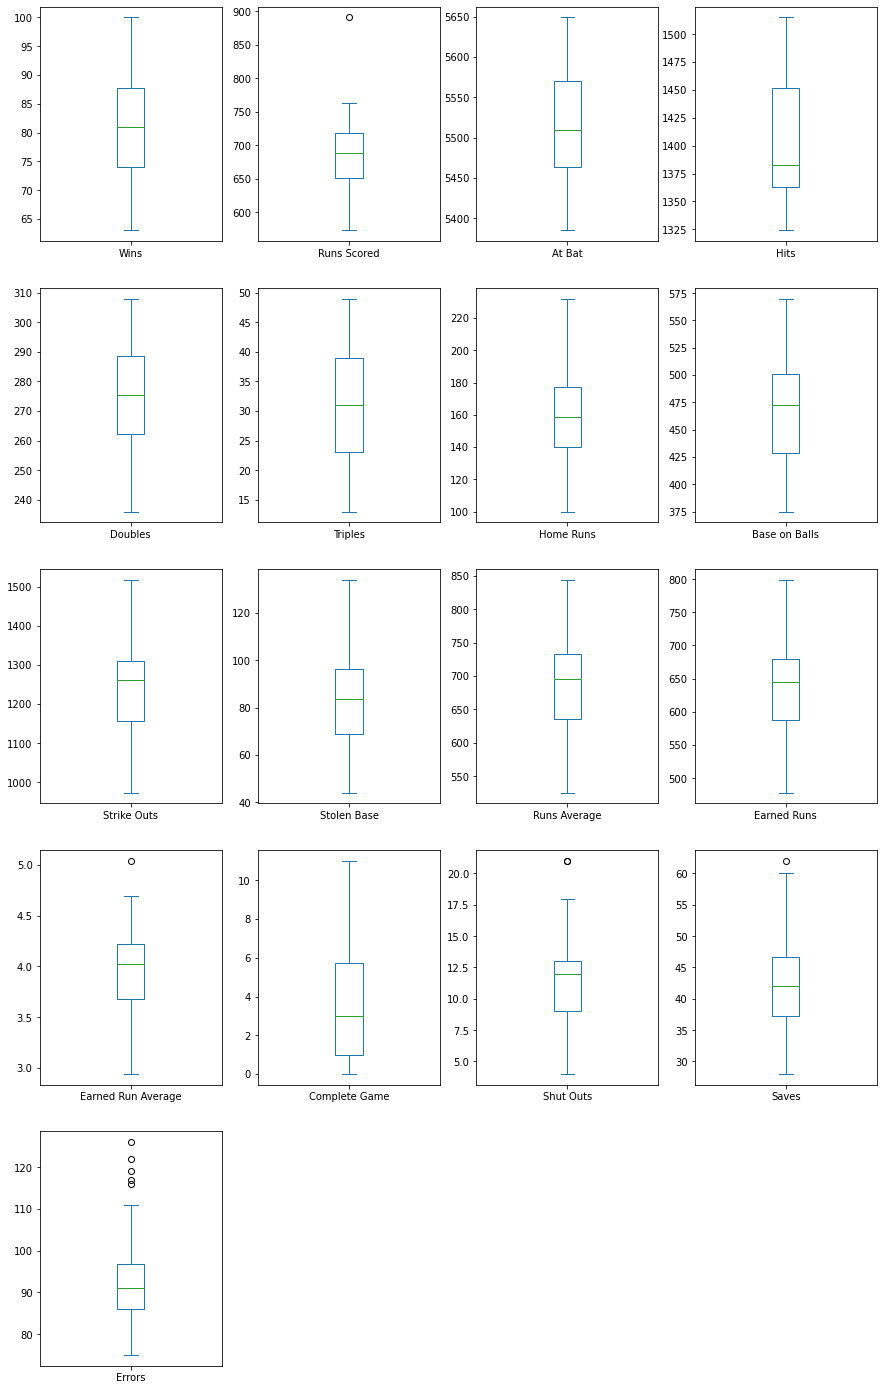

In [59]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(15,25))

We can see the presence of outliers in 'Runs Scored', 'Earned Run Average', 'Shut Outs', 'Saves' and 'Errors'.

## Skewness Checking

Observing the Distplots in the initial Data Visualization stage we will plot distplot for Runs Scored,Hits, Complete Game, Shut Outs and Errors

<AxesSubplot:xlabel='Runs Scored', ylabel='Density'>

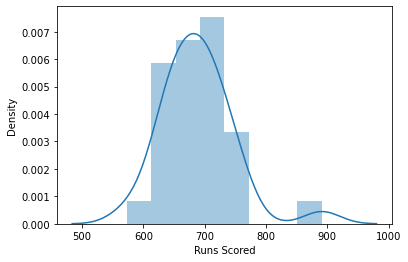

In [60]:
sns.distplot(df['Runs Scored'])

<AxesSubplot:xlabel='Hits', ylabel='Density'>

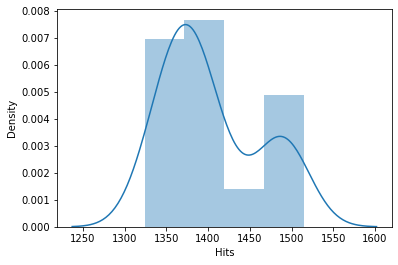

In [61]:
sns.distplot(df['Hits'])

<AxesSubplot:xlabel='Complete Game', ylabel='Density'>

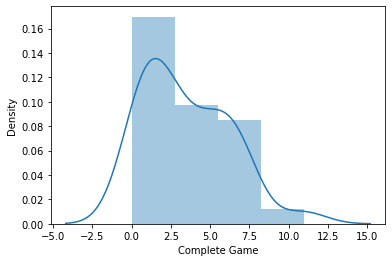

In [62]:
sns.distplot(df['Complete Game'])

<AxesSubplot:xlabel='Shut Outs', ylabel='Density'>

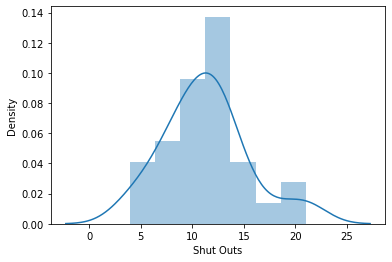

In [63]:
sns.distplot(df['Shut Outs'])

<AxesSubplot:xlabel='Errors', ylabel='Density'>

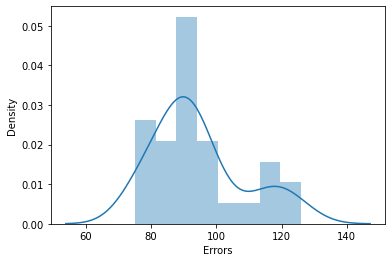

In [64]:
sns.distplot(df['Errors'])

Looking at the above distribution plots we can see that there is skewness due to the outliers which we saw in the boxplot

### Histogram

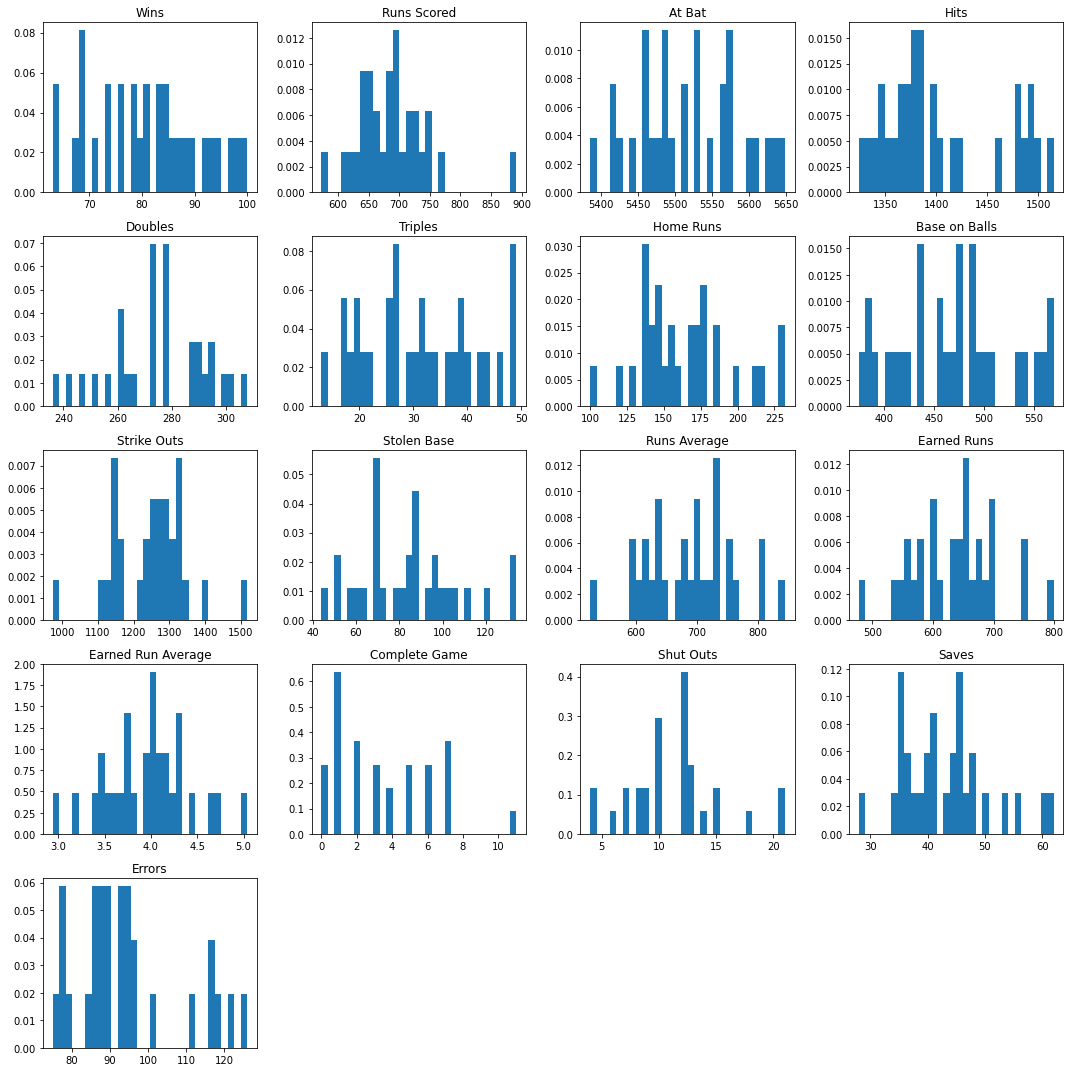

In [65]:
plt.rcParams['figure.figsize'] = (15,15)
df.hist(bins = 30, density = 'True', label = 'Value',histtype = 'stepfilled', grid=False)
plt.tight_layout()
plt.show()

Using Histogram we can see the frequency in the form of bins for all the columns

In [66]:
df.skew().sort_values()

Doubles              -0.230650
Strike Outs          -0.156065
Runs Average          0.045734
Wins                  0.047089
Earned Run Average    0.053331
Earned Runs           0.058710
Triples               0.129502
Base on Balls         0.158498
At Bat                0.183437
Stolen Base           0.479893
Home Runs             0.516441
Shut Outs             0.565790
Saves                 0.657524
Hits                  0.670254
Complete Game         0.736845
Errors                0.890132
Runs Scored           1.200786
dtype: float64

We can see that the data is skewed in Runs Scored,Hits, Complete Game, Saves, Shut Outs and Errors

We will correct the skewness after we check VIF factor and determine which columns to drop

## MultiCollinearity with Variance Inflation Factor

In [67]:
df1=pd.DataFrame(data=df)       # copying the dataframe
df1

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [68]:
x1=df1.iloc[:,1:]
y1=df1.iloc[:,0]

In [69]:
x1

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [70]:
y1

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: Wins, dtype: int64

In [71]:
x1.shape

(30, 16)

In [72]:
y1.shape

(30,)

In [73]:
x1.shape[1]    # 16 number of columns

16

In [74]:
# Importing Required Libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [76]:
calc_vif(x1)

,variables,VIF FACTOR
0,Runs Scored,1638.985029
1,At Bat,4277.157018
2,Hits,4698.798408
3,Doubles,904.439835
4,Triples,32.435486
5,Home Runs,285.773237
6,Base on Balls,269.485018
7,Strike Outs,398.234104
8,Stolen Base,28.654970
9,Runs Average,17204.829356


"Earned Runs" is having the highest Variance Inflation Factor hence we will drop it.

In [77]:
x1=df1.drop(['Earned Runs'],axis=1)

In [78]:
calc_vif(x1)

,variables,VIF FACTOR
0,Wins,1134.084626
1,Runs Scored,3165.873149
2,At Bat,4957.222580
3,Hits,4209.154565
4,Doubles,1134.455638
5,Triples,30.345744
6,Home Runs,239.587650
7,Base on Balls,299.279981
8,Strike Outs,366.553169
9,Stolen Base,27.546490


"Runs Average" is having next highest VIF FACTOR hence we will drop it.

In [79]:
x1=df1.drop(['Earned Runs','Runs Average'],axis=1)

In [80]:
calc_vif(x1)

,variables,VIF FACTOR
0,Wins,1102.620419
1,Runs Scored,3061.013600
2,At Bat,4931.535495
3,Hits,4173.065128
4,Doubles,1062.721139
5,Triples,30.281934
6,Home Runs,238.479206
7,Base on Balls,259.044664
8,Strike Outs,333.976519
9,Stolen Base,26.970708


Observations:
    
We can see that dropping 'Earned Runs','Runs Average' significantly reduces the variance inflation factor. Hence even though the VIF is higher still we will proceed after removing these 2 columns.

We can see that 'Earned Runs','Runs Average' have very high negative correlation with "Wins".  Hence we will drop these 2 columns.

Since removing more than 2 columns wouldnt be feasible since the dataset is small.

# Data Preprocessing

## Data cleaning:

### Dropping a column

We are dropping 'Earned Runs','Runs Average' columns.

In [81]:
df.drop(['Earned Runs','Runs Average'],axis=1,inplace=True)
df

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,4.31,3,10,40,97


In [82]:
df.shape

(30, 15)

## Removing outliers

In [83]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.792164,0.171757,0.320914,0.396360,0.194303


In [84]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [85]:
#row and column
z.iloc[5,1]

3.5096470447193067

In [86]:
z.shape

(30, 15)

In [87]:
len(np.where(z>3)[0])

1

In [88]:
# removing outliers
df_new=df[(z<3).all(axis=1)]
print("Old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows",df.shape[0] - df_new.shape[0])

Old Dataframe (30, 15)
New Dataframe (29, 15)
total_dropped_rows 1


Z score method to get rid of outliers present in our dataset that are not in the acceptable range of +/-3 zscore value.

## Percentage data loss:

In [89]:
loss_percent=(30-29)/30*100
print(loss_percent,'%')

3.3333333333333335 %


After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set

3.3333333333333335% data loss is acceptable.

### df_new is the new data set after 3 columns are removed and all the outliers (with z<3 z score) are removed

In [90]:
df_new.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

I can see that there are still few columns showing slight skewness with respect to the acceptable range of skewness that is +/-0.5.

# Splitting the dataset into Features and Target

In [91]:
X = df_new.iloc[:,1:]     # capital X
y = df_new.iloc[:,0]

In [92]:
X

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,4.24,5,9,45,119


In [93]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: Wins, dtype: int64

In [94]:
X.shape

(29, 14)

In [95]:
y.shape

(29,)

In [96]:
X.skew()

Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

### Transforming data to remove skewness

Since the 'At Bat' and 'Hits' features were coming as Zero after 'yeo-johnson' transformation. We only took the other skewed features and used transformation selectively.

In [97]:
skewed_features = ["Stolen Base", "Complete Game", "Shut Outs", "Saves", "Errors"]

In [98]:
from sklearn.preprocessing import power_transform

In [99]:
transf = PowerTransformer(method='yeo-johnson')

In [100]:
X[skewed_features] = transf.fit_transform(X[skewed_features].values)

In [101]:
X[skewed_features].head()

,Stolen Base,Complete Game,Shut Outs,Saves,Errors
0,0.936132,-0.307098,-0.787002,1.532753,-0.348265
1,-0.516377,-0.307098,0.236737,0.312020,-0.540820
2,0.225038,2.011315,-0.252844,-0.664137,-1.326125
3,-0.618422,1.264463,-0.513555,-0.820689,0.650818
4,0.095038,1.264463,0.236737,-1.149165,-0.540820


In [102]:
X.head()

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,724,5575,1497,300,42,139,383,973,0.936132,3.73,-0.307098,-0.787002,1.532753,-0.348265
1,696,5467,1349,277,44,156,439,1264,-0.516377,4.07,-0.307098,0.236737,0.312020,-0.540820
2,669,5439,1395,303,29,141,533,1157,0.225038,3.67,2.011315,-0.252844,-0.664137,-1.326125
3,622,5533,1381,260,27,136,404,1231,-0.618422,3.98,1.264463,-0.513555,-0.820689,0.650818
4,689,5605,1515,289,49,151,455,1259,0.095038,4.64,1.264463,0.236737,-1.149165,-0.540820


In [103]:
X.skew()

Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base          -0.009570
Earned Run Average    0.016693
Complete Game        -0.045947
Shut Outs             0.000529
Saves                -0.000925
Errors                0.065585
dtype: float64

Hence the skewness is removed.

### Scaling the independant variable (x) to get all the columns in a standard scale

In [104]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(X)
x1

array([[ 9.59398345e-01,  8.30084222e-01,  1.73830631e+00,
         1.55653766e+00,  1.01084549e+00, -7.65863143e-01,
        -1.53635899e+00, -2.72762331e+00,  9.36131648e-01,
        -5.11388277e-01, -3.07098204e-01, -7.87002186e-01,
         1.53275292e+00, -3.48265262e-01],
       [ 3.31147171e-01, -7.02830744e-01, -9.38697881e-01,
         2.01171316e-01,  1.20891656e+00, -1.81388639e-01,
        -4.95020511e-01,  1.21895521e-01, -5.16377335e-01,
         2.38952260e-01, -3.07098204e-01,  2.36736538e-01,
         3.12020186e-01, -5.40819806e-01],
       [-2.74666462e-01, -1.10025314e+00, -1.06656038e-01,
         1.73332457e+00, -2.76616501e-01, -6.97101437e-01,
         1.25294051e+00, -9.25865699e-01,  2.25038365e-01,
        -6.43801313e-01,  2.01131531e+00, -2.52844176e-01,
        -6.64136739e-01, -1.32612477e+00],
       [-1.32923093e+00,  2.33950624e-01, -3.59886164e-01,
        -8.00621197e-01, -4.74687576e-01, -8.69005703e-01,
        -1.14585706e+00, -2.01245790e-01, -6.

since the different columns were out of scale we performed scaling operation on all the independant variables columns to bring it into the same scale.


reassigning column names

In [105]:
X.columns

Index(['Runs Scored', 'At Bat', 'Hits', 'Doubles', 'Triples', 'Home Runs',
       'Base on Balls', 'Strike Outs', 'Stolen Base', 'Earned Run Average',
       'Complete Game', 'Shut Outs', 'Saves', 'Errors'],
      dtype='object')

In [106]:
x = pd.DataFrame(x1,columns=X.columns)

In [107]:
x

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.936132,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.516377,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.225038,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.618422,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,0.095038,1.496876,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.070480,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.884526,0.150677,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-0.558853,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-2.082843,0.194815,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,-0.323710,0.260100,0.020490,0.196801,-0.550807,0.572335,0.267558,-0.489319,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.702131,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.466233,0.768604,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.327453,0.319029,0.020490,0.368705,0.695081,-0.181661,0.824915,0.614123,0.770649,-0.513555,0.312020,1.554265


In [108]:
x.skew()

Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base          -0.009570
Earned Run Average    0.016693
Complete Game        -0.045947
Shut Outs             0.000529
Saves                -0.000925
Errors                0.065585
dtype: float64

In [109]:
calc_vif(x)

,variables,VIF FACTOR
0,Runs Scored,6.163117
1,At Bat,5.220723
2,Hits,8.369874
3,Doubles,3.205208
4,Triples,3.142543
5,Home Runs,6.339287
6,Base on Balls,3.050467
7,Strike Outs,2.255387
8,Stolen Base,1.885424
9,Earned Run Average,4.797563


Hence all the skewness have been removed and all the feature columns have been set to a standard scale.

It can be observed that all the values are less than 10 which means we have solved the multicollinearity problem. let's move to model building.

Now the data is ready for Machine learing

# Machine Learning

Since the y (Target) has continuous values we will use Linear Regression model

### Finding Best Random State

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
lr = LinearRegression()

In [111]:
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is :  {r2_score(y_test,pred_test)}")
    print("\n")

At random state 1, the training accuracy is : 0.9589350047369717
At random state 1, the testing accuracy is :  0.776281264837921


At random state 2, the training accuracy is : 0.9559851430540451
At random state 2, the testing accuracy is :  -0.34426118031430475


At random state 3, the training accuracy is : 0.9418647885585765
At random state 3, the testing accuracy is :  0.873025867651172


At random state 4, the training accuracy is : 0.952955635941381
At random state 4, the testing accuracy is :  0.8202372322306551


At random state 5, the training accuracy is : 0.956124731506768
At random state 5, the testing accuracy is :  0.5202058898278642


At random state 6, the training accuracy is : 0.9293424004396398
At random state 6, the testing accuracy is :  0.9358987817909092


At random state 7, the training accuracy is : 0.9520347988224689
At random state 7, the testing accuracy is :  0.6887241567500249


At random state 8, the training accuracy is : 0.9684204165292023
At random sta

At random state 82, the training accuracy is : 0.9603023654551527
At random state 82, the testing accuracy is :  0.637788621836336


At random state 83, the training accuracy is : 0.9670427355326943
At random state 83, the testing accuracy is :  0.37845490610299837


At random state 84, the training accuracy is : 0.9514746825930835
At random state 84, the testing accuracy is :  0.7405666035978852


At random state 85, the training accuracy is : 0.9417723737964285
At random state 85, the testing accuracy is :  0.8172982753019968


At random state 86, the training accuracy is : 0.9563276618802634
At random state 86, the testing accuracy is :  0.05085841262961888


At random state 87, the training accuracy is : 0.9417678520272711
At random state 87, the testing accuracy is :  0.7667004285840024


At random state 88, the training accuracy is : 0.9702281342904445
At random state 88, the testing accuracy is :  -0.995952907084773


At random state 89, the training accuracy is : 0.949511457474

At random state 178, the training accuracy is : 0.9652984288829705
At random state 178, the testing accuracy is :  0.5372631554643569


At random state 179, the training accuracy is : 0.9758446561612145
At random state 179, the testing accuracy is :  0.5311835277573802


At random state 180, the training accuracy is : 0.9656389254728895
At random state 180, the testing accuracy is :  0.6392074265079322


At random state 181, the training accuracy is : 0.9424053930439202
At random state 181, the testing accuracy is :  0.8692315049660341


At random state 182, the training accuracy is : 0.9660307971731211
At random state 182, the testing accuracy is :  -0.33327850877296106


At random state 183, the training accuracy is : 0.9588207806655547
At random state 183, the testing accuracy is :  0.7326013970711618


At random state 184, the training accuracy is : 0.9530159470615763
At random state 184, the testing accuracy is :  0.819865389799656


At random state 185, the training accuracy is :

We can see the training and testing accuracy score is highest in random state 47.

In [112]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9815428783489649 on Random State 47


In both methods we get the best random state as 47.

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=47)

In [114]:
x_train.shape

(23, 14)

In [115]:
x_test.shape

(6, 14)

In [116]:
y_train.shape

(23,)

In [117]:
y_test.shape

(6,)

In [118]:
lr.fit(x_train,y_train)

LinearRegression()

In [119]:
pred_test = lr.predict(x_test)

In [120]:
print(r2_score(y_test,pred_test))

0.9815428783489649


### Cross Validation of the model

In [121]:
from sklearn.model_selection import cross_val_score

In [122]:
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)

for j in range(4,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print(f"accuracy score for training is {train_accuracy}")
    print(f"accuracy score for testing is {test_accuracy}")
    print("\n")

At cross fold 4 the cv score is 0.3647110555072241
accuracy score for training is -1.2904889815598217
accuracy score for testing is 0.9815428783489649


At cross fold 5 the cv score is 0.3783472629014379
accuracy score for training is -1.2904889815598217
accuracy score for testing is 0.9815428783489649


At cross fold 6 the cv score is 0.3380015112117351
accuracy score for training is -1.2904889815598217
accuracy score for testing is 0.9815428783489649


At cross fold 7 the cv score is 0.1910047075512706
accuracy score for training is -1.2904889815598217
accuracy score for testing is 0.9815428783489649


At cross fold 8 the cv score is 0.3853632870483785
accuracy score for training is -1.2904889815598217
accuracy score for testing is 0.9815428783489649


At cross fold 9 the cv score is -6.421191407572919
accuracy score for training is -1.2904889815598217
accuracy score for testing is 0.9815428783489649




Hence we can take best CV as 8

We will draw the linear regression plot to see the best fit line

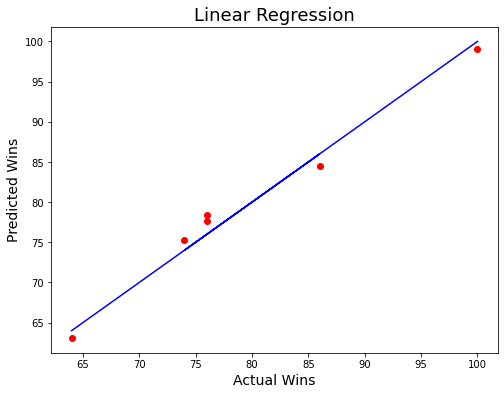

In [123]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins', fontsize=14)
plt.ylabel('Predicted Wins', fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

We can see that all the points are almost fitting the best fit line

In [124]:
# importing all the required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [125]:
# creating a function to run all the regressors

def regressor(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=8).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

### Linear Regression

In [126]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 1.5263351239552656
R2 Score is: 98.1542878348965
Cross Validation Score is: 38.53632870483785
R2 Score - Cross Validation Score is 59.617959130058644


### L1 -- Lasso Regression

In [127]:
model=Lasso(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 1.4878878102908455
R2 Score is: 98.2461011246383
Cross Validation Score is: 38.81964531641001
R2 Score - Cross Validation Score is 59.42645580822829


### L2 -- Ridge Regression

In [128]:
model=Ridge(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 1.5223923453720876
R2 Score is: 98.16381108457503
Cross Validation Score is: 38.548649906139154
R2 Score - Cross Validation Score is 59.615161178435876


### Elastic Net

In [179]:
model=ElasticNet(alpha=0.01)
regressor(model, x, y)

Root Mean Square Error is: 1.320629249467281
R2 Score is: 98.61826104481192
Cross Validation Score is: 41.08028265459826
R2 Score - Cross Validation Score is 57.53797839021366


### Support Vector Regression

In [130]:
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 10.679064327969181
R2 Score is: 9.649495221114911
Cross Validation Score is: -52.10511068262509
R2 Score - Cross Validation Score is 61.75460590374


In [131]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 11.001696716584917
R2 Score is: 4.1077486097325755
Cross Validation Score is: -48.46264140514791
R2 Score - Cross Validation Score is 52.57039001488049


In [132]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 4.447900081119483
R2 Score is: 84.32620280065103
Cross Validation Score is: 19.054525787676642
R2 Score - Cross Validation Score is 65.2716770129744


### Decision Tree Regressor

In [141]:
model=DecisionTreeRegressor()
regressor(model, x, y)

Root Mean Square Error is: 4.453463071962462
R2 Score is: 84.28697183098592
Cross Validation Score is: -169.46715023477074
R2 Score - Cross Validation Score is 253.75412206575666


### Random Forest Regressor

In [134]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 6.206688596452488
R2 Score is: 69.48003080985914
Cross Validation Score is: -24.26331819790259
R2 Score - Cross Validation Score is 93.74334900776174


### K Neighbors Regressor

In [135]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 7.5308255412891745
R2 Score is: 55.06866197183095
Cross Validation Score is: -1.7092171670701373
R2 Score - Cross Validation Score is 56.777879138901085


### SGD Regressor

In [140]:
model=SGDRegressor()
regressor(model, x, y)

Root Mean Square Error is: 3.9569467586381974
R2 Score is: 87.59534781194753
Cross Validation Score is: 21.636302268368823
R2 Score - Cross Validation Score is 65.95904554357871


### Gradient Boosting Regressor

In [137]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 5.721705265045351
R2 Score is: 74.06327462496222
Cross Validation Score is: -84.99919585409944
R2 Score - Cross Validation Score is 159.06247047906166


### Ada Boost Regressor

In [138]:
model=AdaBoostRegressor(random_state=47)
regressor(model, x, y)

Root Mean Square Error is: 6.337639979386209
R2 Score is: 68.17859818883541
Cross Validation Score is: -43.92959779110134
R2 Score - Cross Validation Score is 112.10819597993674


### Extra Trees Regressor

In [139]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
regressor(model, x, y)

Root Mean Square Error is: 7.733079378014083
R2 Score is: 52.6228301056338
Cross Validation Score is: 2.682318809323286
R2 Score - Cross Validation Score is 49.94051129631052


Comparing all the above the Elastic Net Regression gives the best results since the R2 Score - Cross Validation Score is least compared to all the others and at the same time the accuracy is also 98.297%

# Hyper parameter tuning

In [167]:
#ElasticNet?

In [158]:
ElasticNet().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [180]:
# creating parameters list to pass into GridSearchCV
parameters = {'alpha':[0.01],
              'copy_X' : [True, False],
              'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'positive' : [True, False],
              'random_state':[47,100,150],
              'selection' : ['cyclic', 'random']}

In [181]:
GCV = GridSearchCV(ElasticNet(), parameters, cv=8)

In [182]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=ElasticNet(),
             param_grid={'alpha': [0.01], 'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False], 'positive': [True, False],
                         'random_state': [47, 100, 150],
                         'selection': ['cyclic', 'random']})

In [183]:
GCV.best_params_          # printing best parameters found by GridSearchCV

{'alpha': 0.01,
 'copy_X': True,
 'fit_intercept': True,
 'normalize': True,
 'positive': False,
 'random_state': 100,
 'selection': 'random'}

We got the best parameters using Gridsearch CV

In [200]:
final_model = ElasticNet(alpha = 0.01, copy_X = True, fit_intercept = True, normalize = True, positive = False, random_state = 100,selection = 'random')

In [201]:
final_fit = final_model.fit(x_train,y_train)   # final fit

In [202]:
final_pred = final_model.predict(x_test)   # predicting with best parameters

In [203]:
best_r2=r2_score(y_test,final_pred,multioutput='variance_weighted')*100   # checking final r2_score
print("R2 score for the Best Model is:", best_r2)

R2 score for the Best Model is: 89.64103871373761


In [204]:
final_cv_score = (cross_val_score(final_model, x, y, cv=8).mean())*100
print("Cross Validation Score is:", final_cv_score)

Cross Validation Score is: 45.4902450684306


In [206]:
final_rmse = mean_squared_error(y_test, final_pred, squared=False)
print("Root Mean Square Error is:", final_rmse)

Root Mean Square Error is: 3.615979968785791


We used Hyper Parameter Tuning on the final model to obtained the best r2_score and CV score.

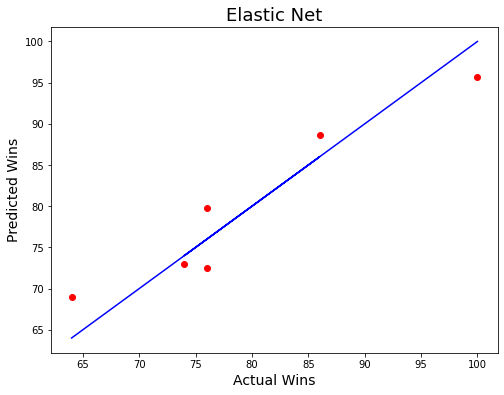

In [208]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=final_pred, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins', fontsize=14)
plt.ylabel('Predicted Wins', fontsize=14)
plt.title('Elastic Net',fontsize=18)
plt.show()

Plotting the Final model actual Wins vs Predicted Wins

# Saving the model in pickle Format

In [205]:
# pickeling or serialization of a file
import pickle
filename = 'Baseball_Case_Study_Project_final_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

Saving the best regression model using pickle

# Prediction Conclusion:

In [207]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

,original,predicted
0,100,95.655170
1,76,72.542870
2,74,72.946821
3,86,88.671609
4,76,79.767685
5,64,69.018012


Finally Predicting the Wins using the y_test feature values.

# Thank you